# MS Analyser (playground)

Objectives:
- classification into 3 types
- distinction between valid stress increase (alert) and false positive (log and learn)

In [0]:
from keras.models import Sequential

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
rootPath = "/content/drive/My Drive/ppg_data/wrist-ppg-during-exercise-1.0.0/"

In [0]:
f = open(rootPath + "ANNOTATORS", "r", encoding="utf-8")

In [0]:
import pandas as pd

In [23]:
pd.Series(f)

0    atr\tReference ECG peaks
dtype: object

In [24]:
!pip install wfdb

In [0]:
import wfdb

In [0]:
tpath = rootPath + "s1_high_resistance_bike"

In [0]:
f = open(tpath+".dat", "r", encoding="utf-8")

In [0]:
rec = wfdb.io.rdrecord(tpath)

In [30]:
subrec = wfdb.rdann(tpath, 'dat')

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:961: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]


In [36]:
rec.p_signal.shape

(150785, 15)

In [35]:
subrec

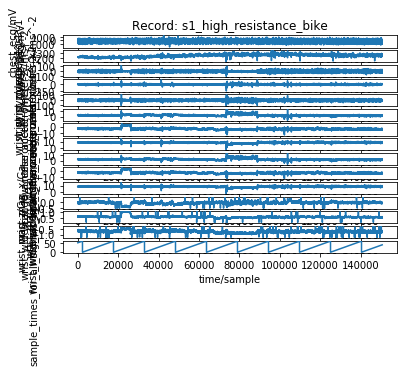

In [0]:
wfdb.plot_wfdb(rec)

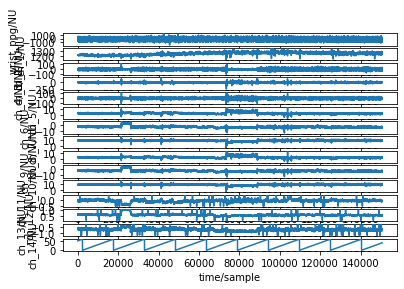

In [42]:
wfdb.plot_items(rec.p_signal, sig_name=["wrist_ppg"])

In [45]:
len(rec.sig_name)

15

In [0]:
display(rec.__dict__)

{'adc_gain': [21.6691,
  297.5305,
  302.2647,
  163.6502,
  289.0765,
  3420.4251,
  3957.3531,
  3704.5378,
  3509.8327,
  4038.253,
  3907.18,
  73380.1255,
  68761.9758,
  61349.3142,
  1092.3062],
 'adc_res': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'adc_zero': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'base_counter': None,
 'base_date': None,
 'base_time': None,
 'baseline': [5670,
  -367431,
  -2934,
  5931,
  -971,
  -11434,
  16154,
  -23048,
  -11704,
  16500,
  -24829,
  3872,
  -39979,
  46294,
  -32770],
 'block_size': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'byte_offset': [None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None],
 'checksum': [12366,
  -13854,
  30678,
  24454,
  1414,
  76,
  11602,
  630,
  5925,
  -6008,
  19339,
  -18710,
  -7732,
  878,
  -4634],
 'comments': ['High resistance biking_level 6'],
 'counter_freq': None,
 'd_signal': None,
 'e_d_signal': None,
 'e_p_signal'

# Data ops

In [0]:
header = wfdb.rdheader('s1_high_resistance_bike', pb_dir='wrist')
record = wfdb.rdrecord('s1_high_resistance_bike', pb_dir='wrist', sampfrom=20000, sampto=21000)

In [82]:
header.__dict__['sig_name']

['chest_ecg',
 'wrist_ppg',
 'wrist_gyro_x',
 'wrist_gyro_y',
 'wrist_gyro_z',
 'wrist_low_noise_accelerometer_x',
 'wrist_low_noise_accelerometer_y',
 'wrist_low_noise_accelerometer_z',
 'wrist_wide_range_accelerometer_x',
 'wrist_wide_range_accelerometer_y',
 'wrist_wide_range_accelerometer_z',
 'wrist_mag_x',
 'wrist_mag_y',
 'wrist_mag_z',
 'sample_times_for_all_signals_apart_from_ecg']

In [119]:
record.p_signal[:,1].shape

(1000,)

In [0]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

matplotlib.rcParams['figure.dpi'] = 150


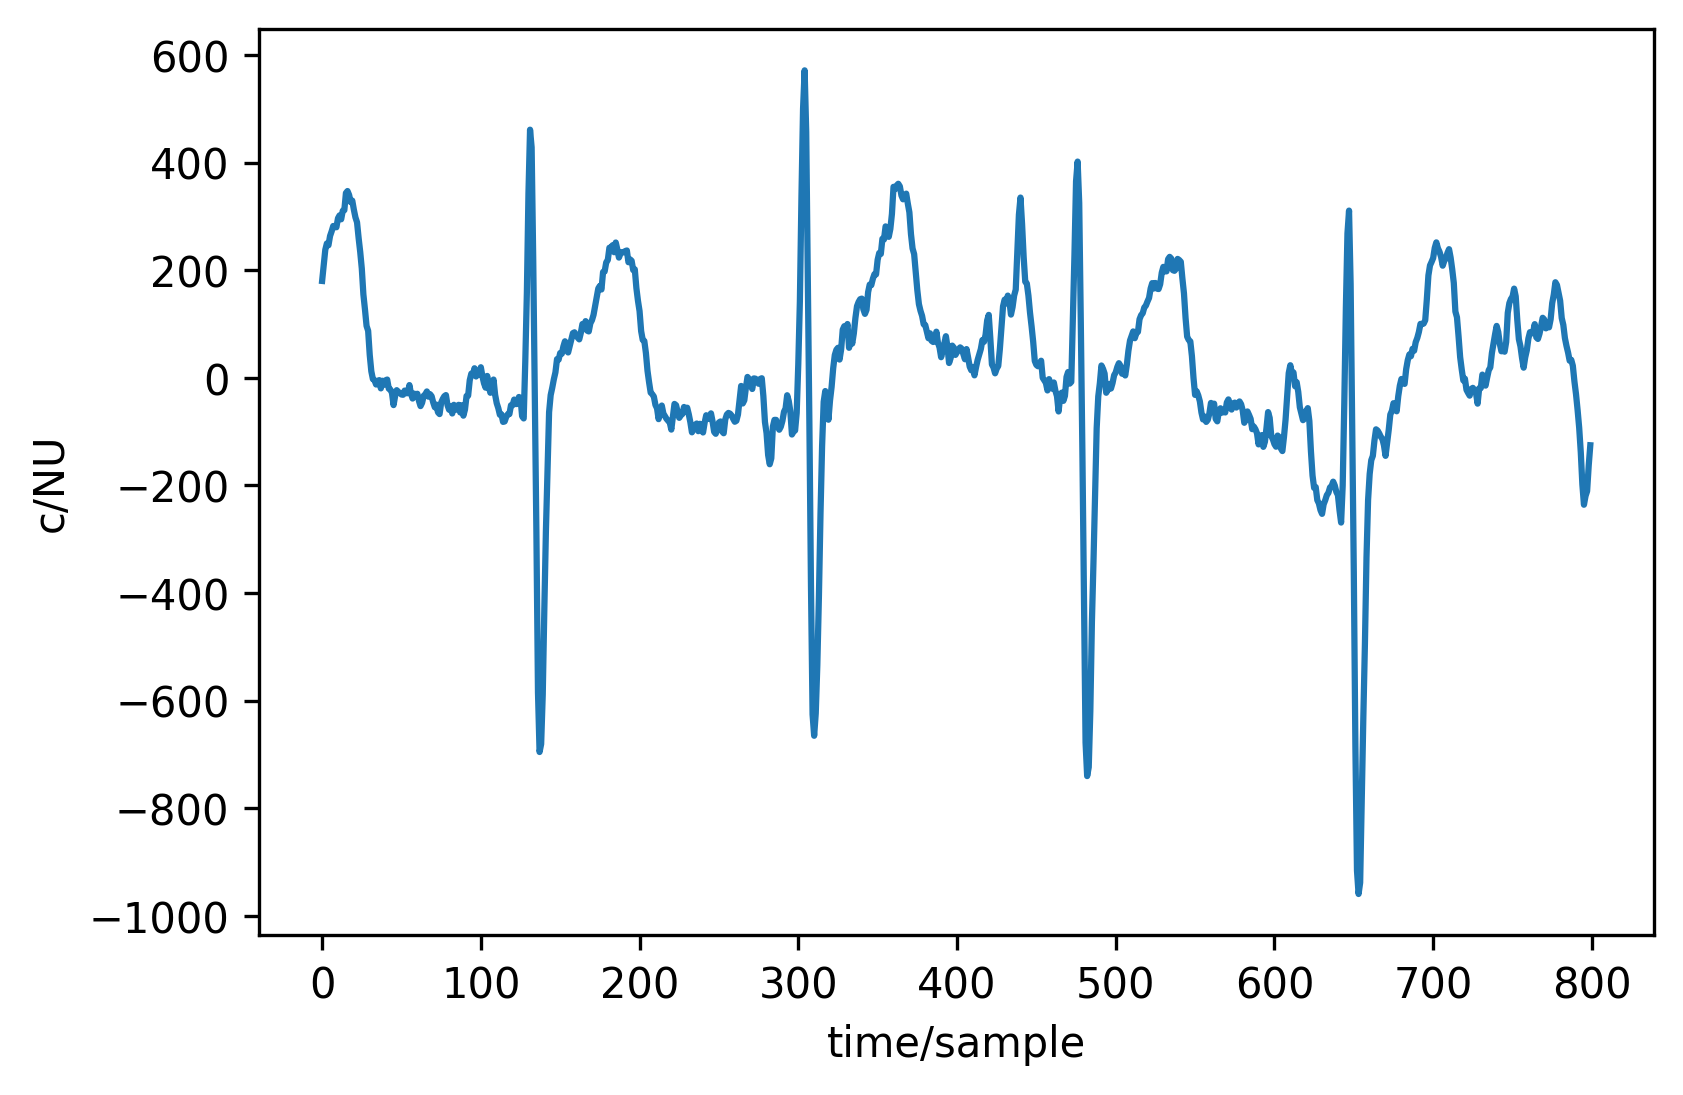

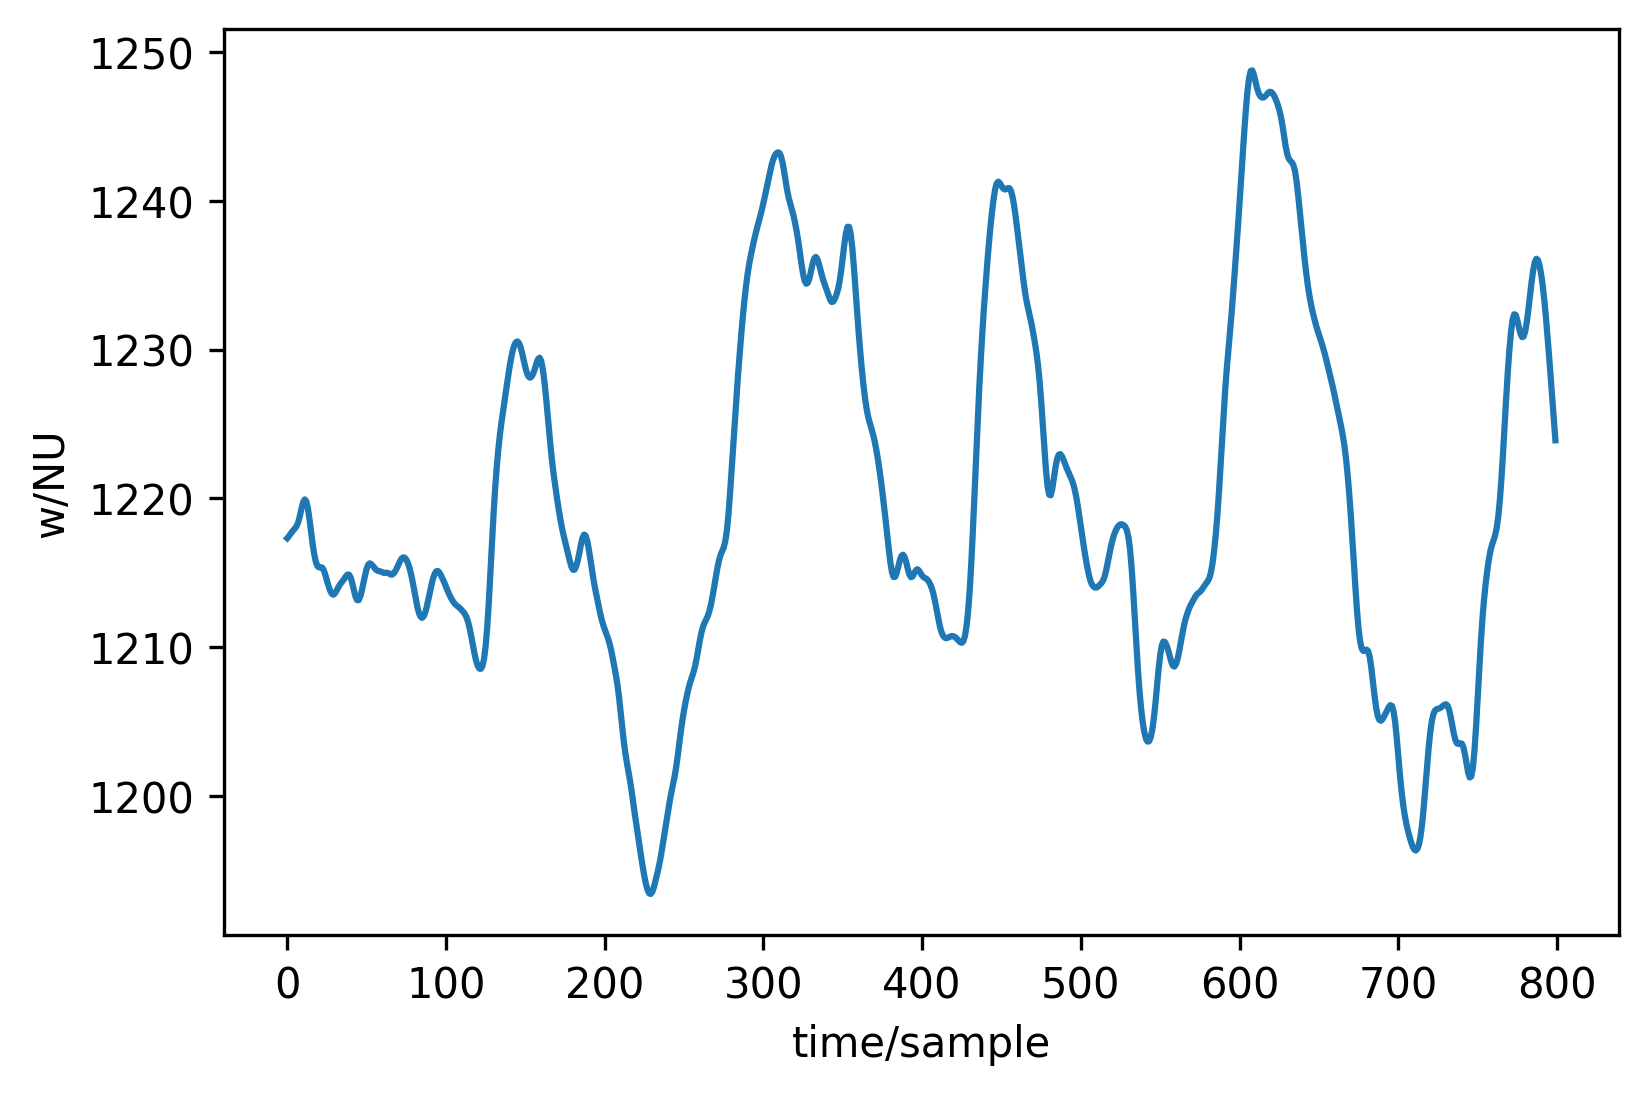

In [88]:
wfdb.plot_items(record.p_signal[:,0], sig_name='chest_ecg')
wfdb.plot_items(record.p_signal[:,1], sig_name='wrist_ppg')

In [0]:
import numpy as np

In [0]:
normalized = np.multiply(np.subtract(record.p_signal[:,1], 1220), 30)

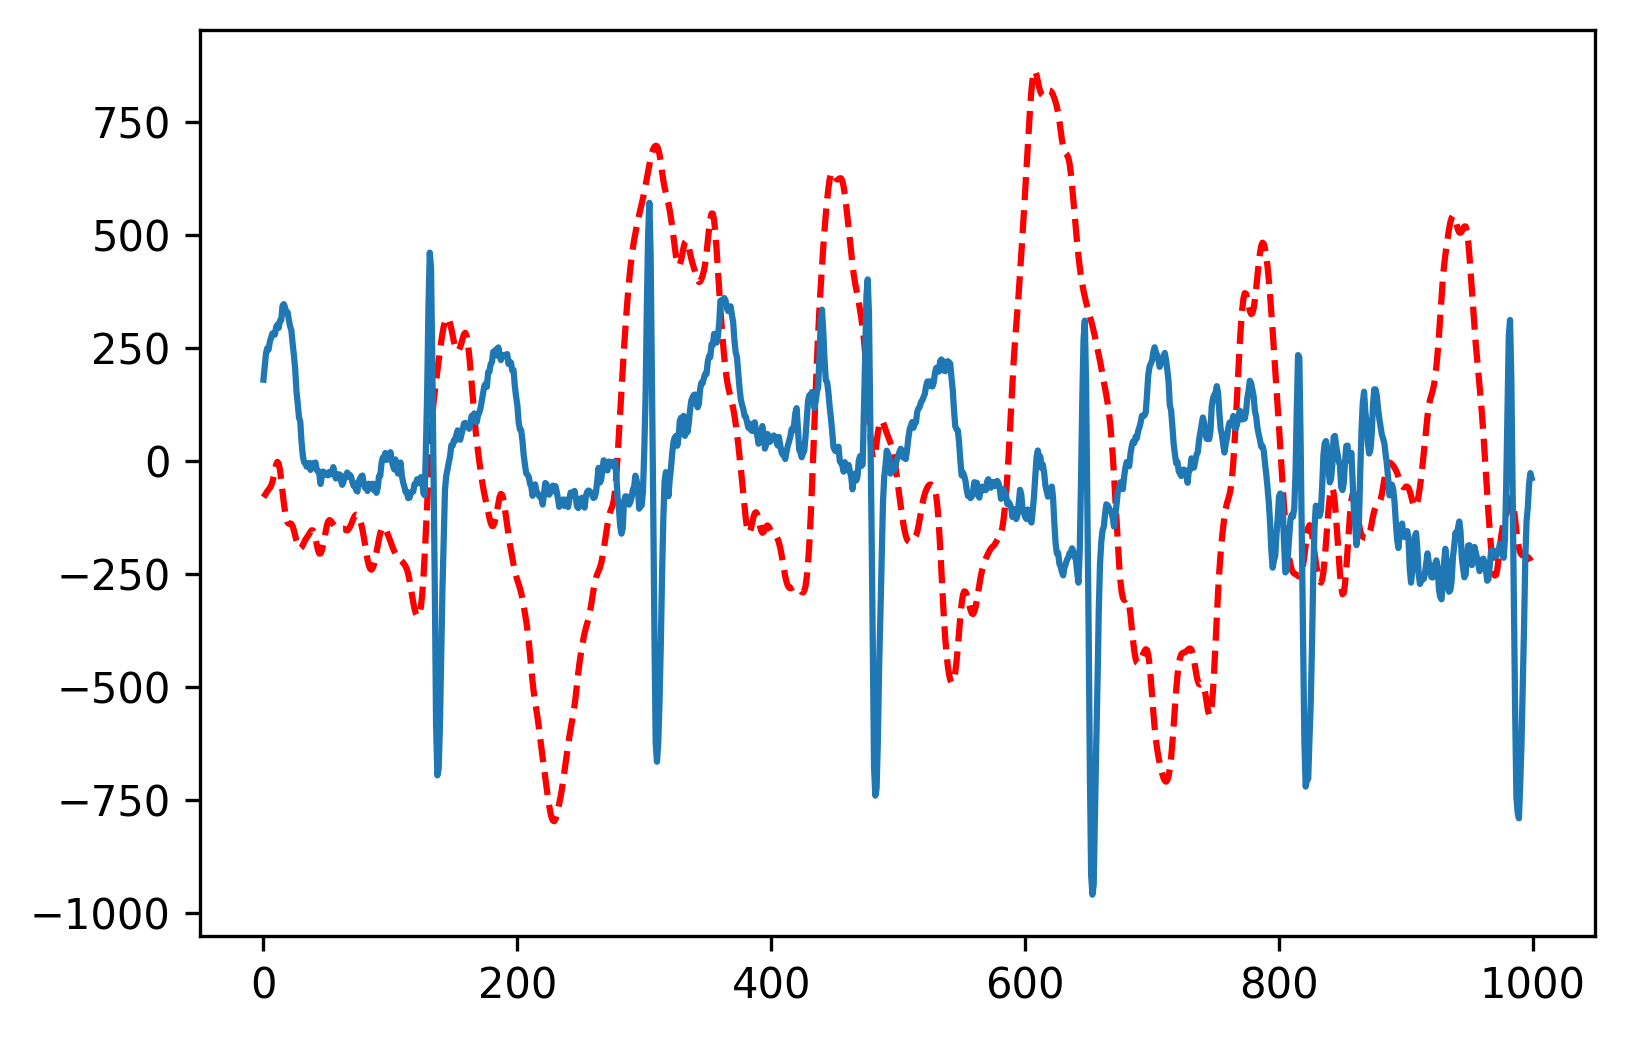

In [111]:
plt.plot(normalized, "r--", record.p_signal[:,0])
plt.show()

In [126]:
data=record.p_signal[:,1]
print(np.var(data))
print(np.min(data))
print(np.max(data))
print(np.std(data))

141.16213015245793
1193.427228469014
1248.766092887956
11.881167036636509


In [0]:
type='s1_high_resistance_bike'
def displaySamples(x=0):
  record = wfdb.rdrecord(type, pb_dir='wrist', sampfrom=x, sampto=x+1000)
  wfdb.plot_items(record.p_signal[:,1], sig_name='wrist_ppg')


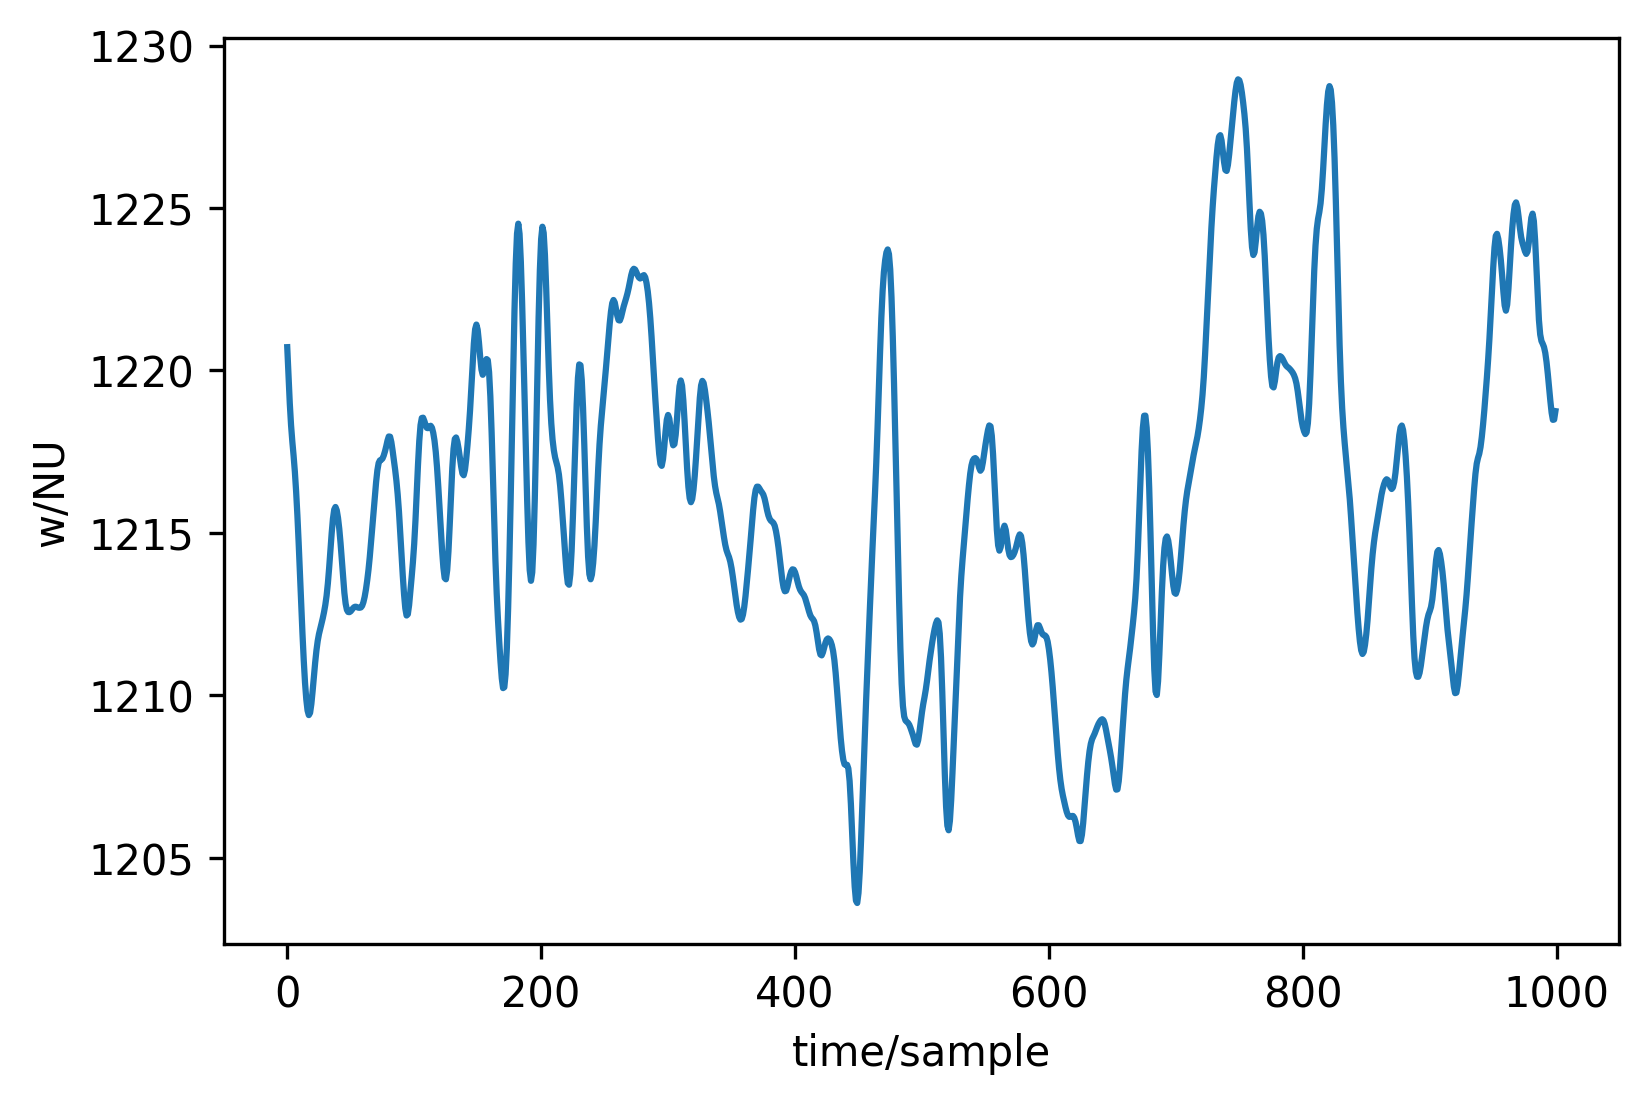

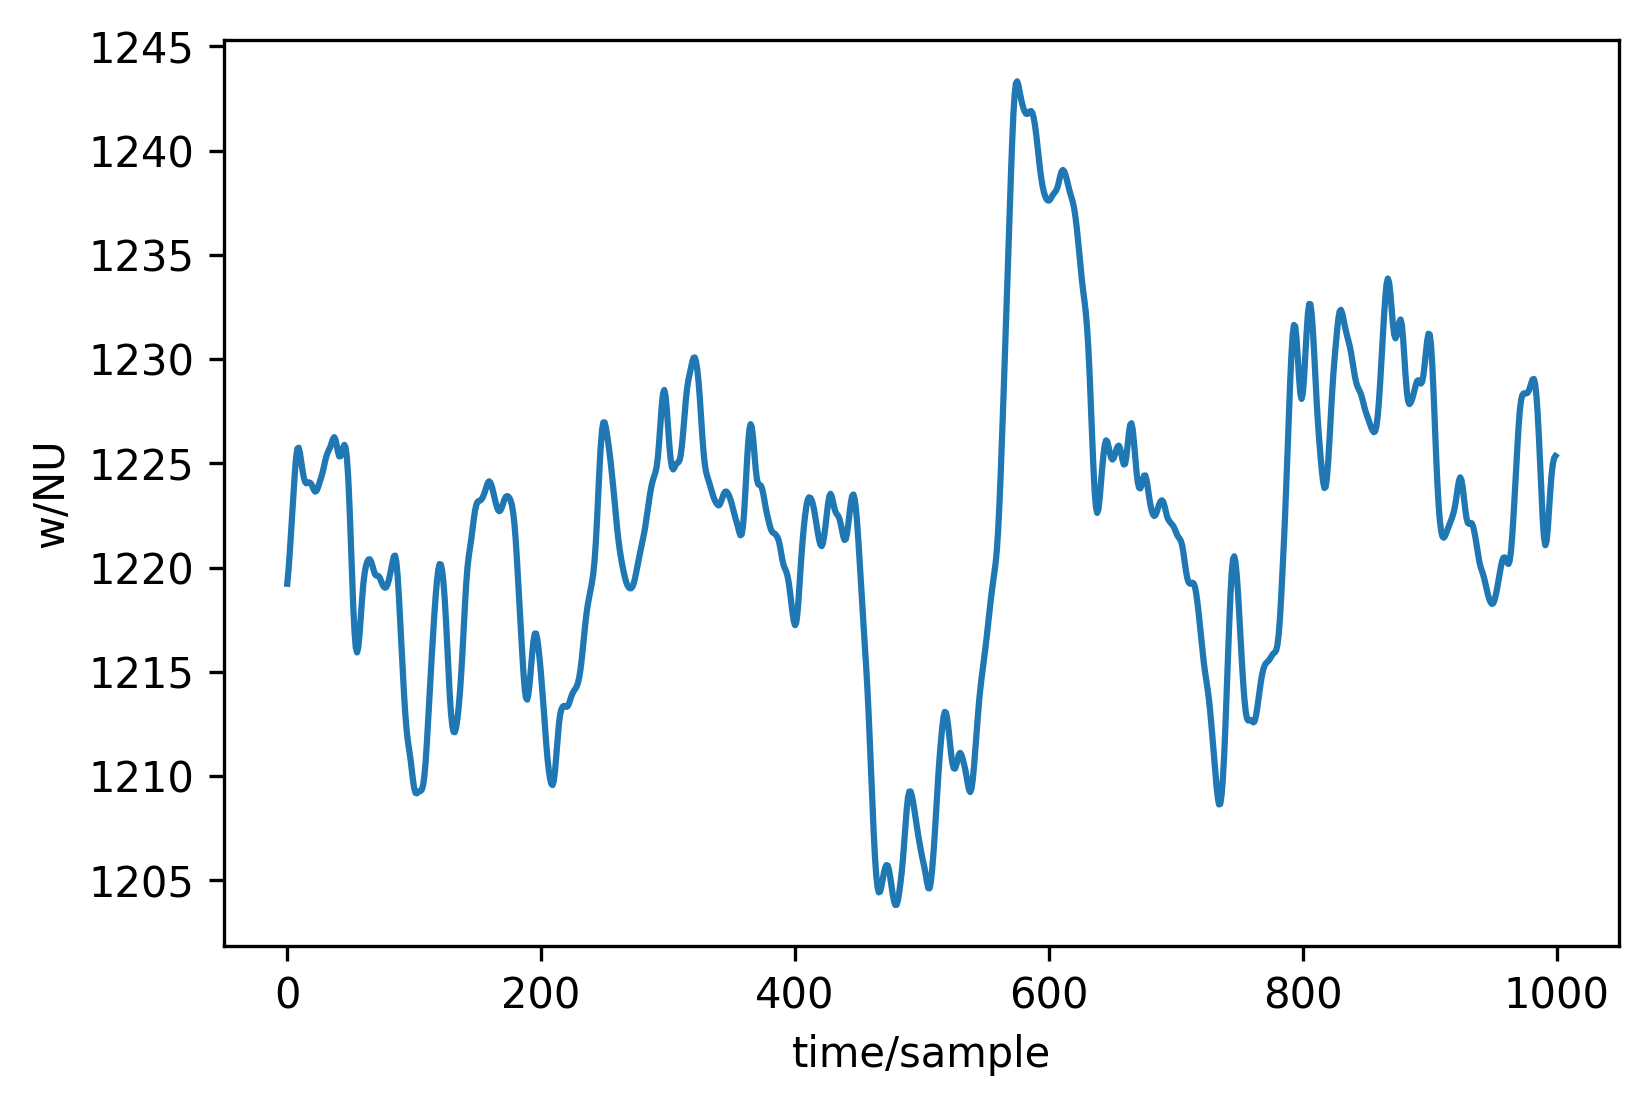

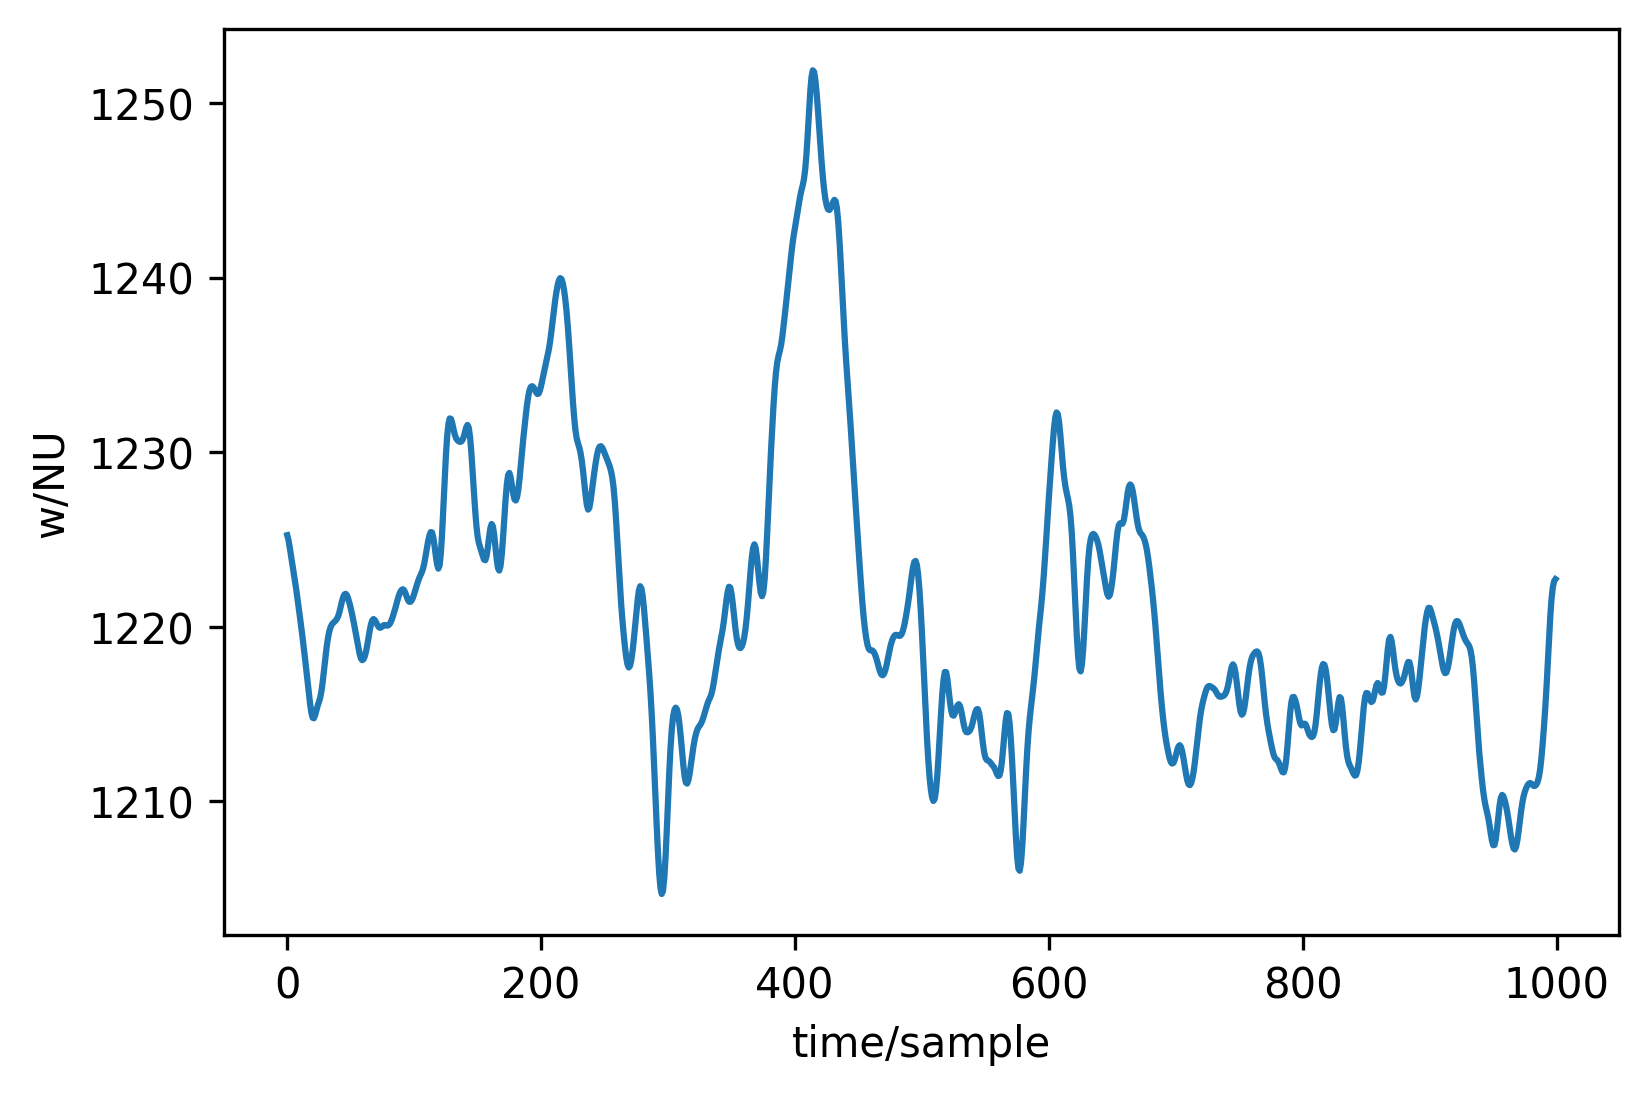

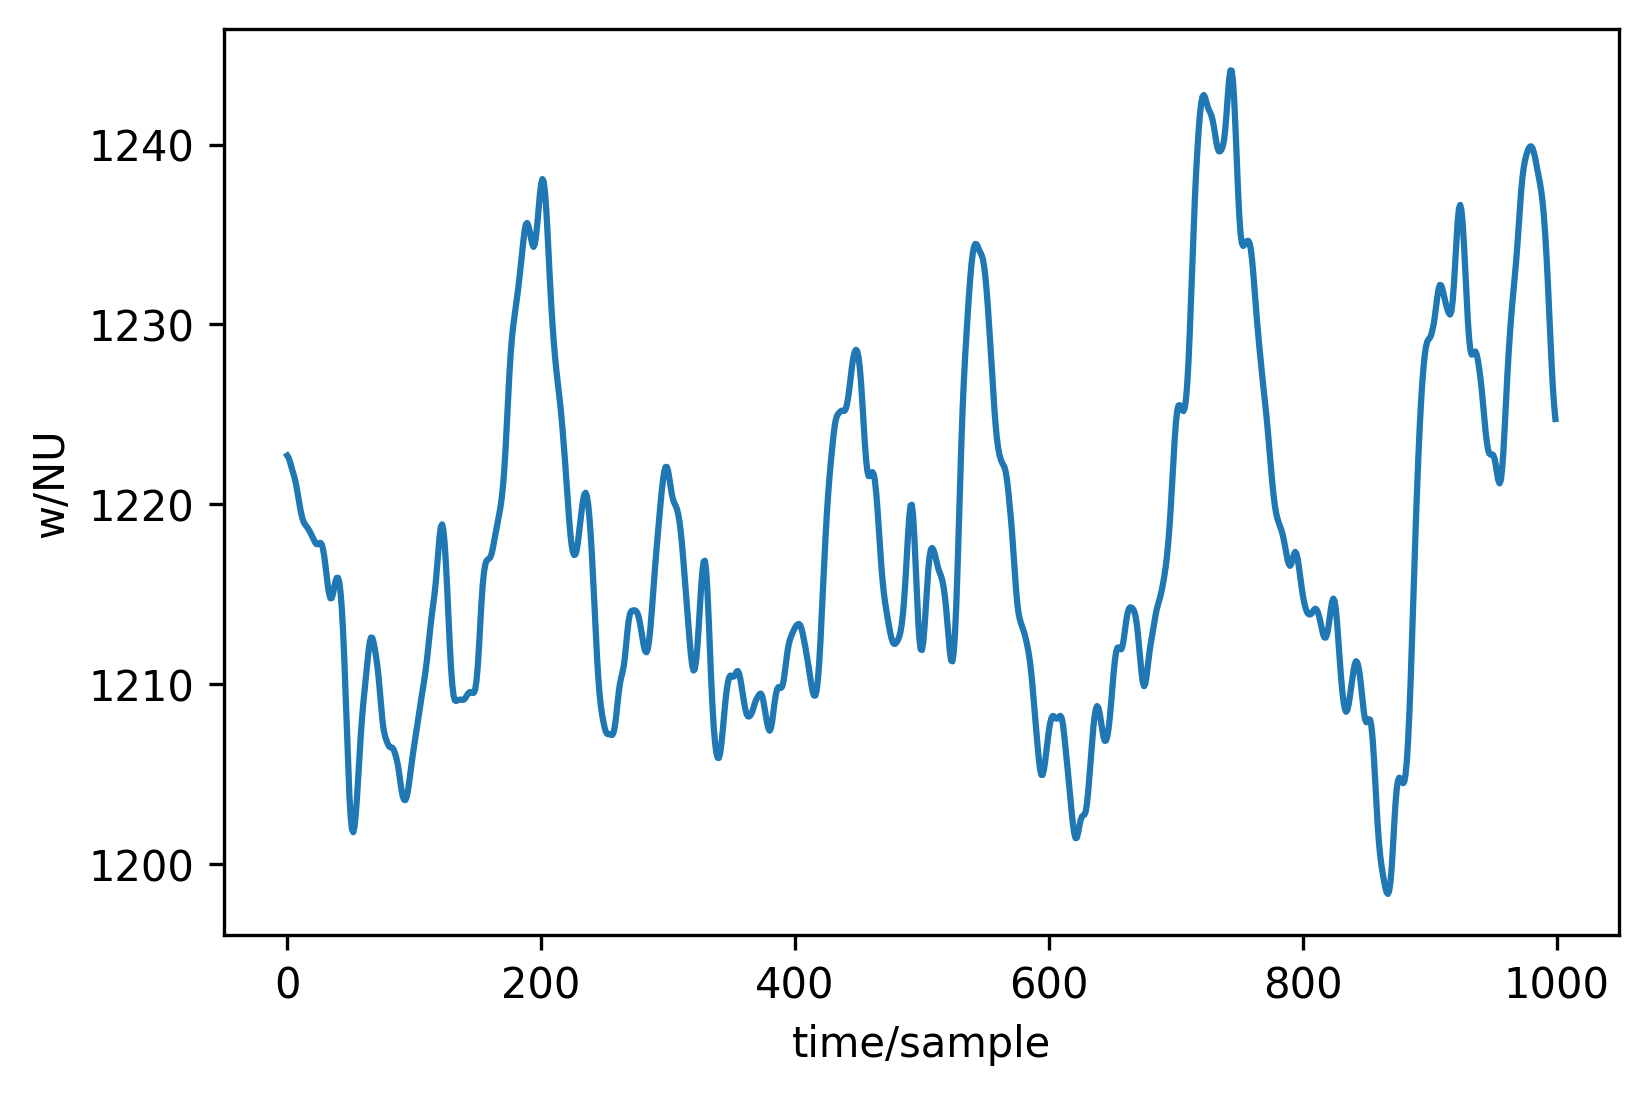

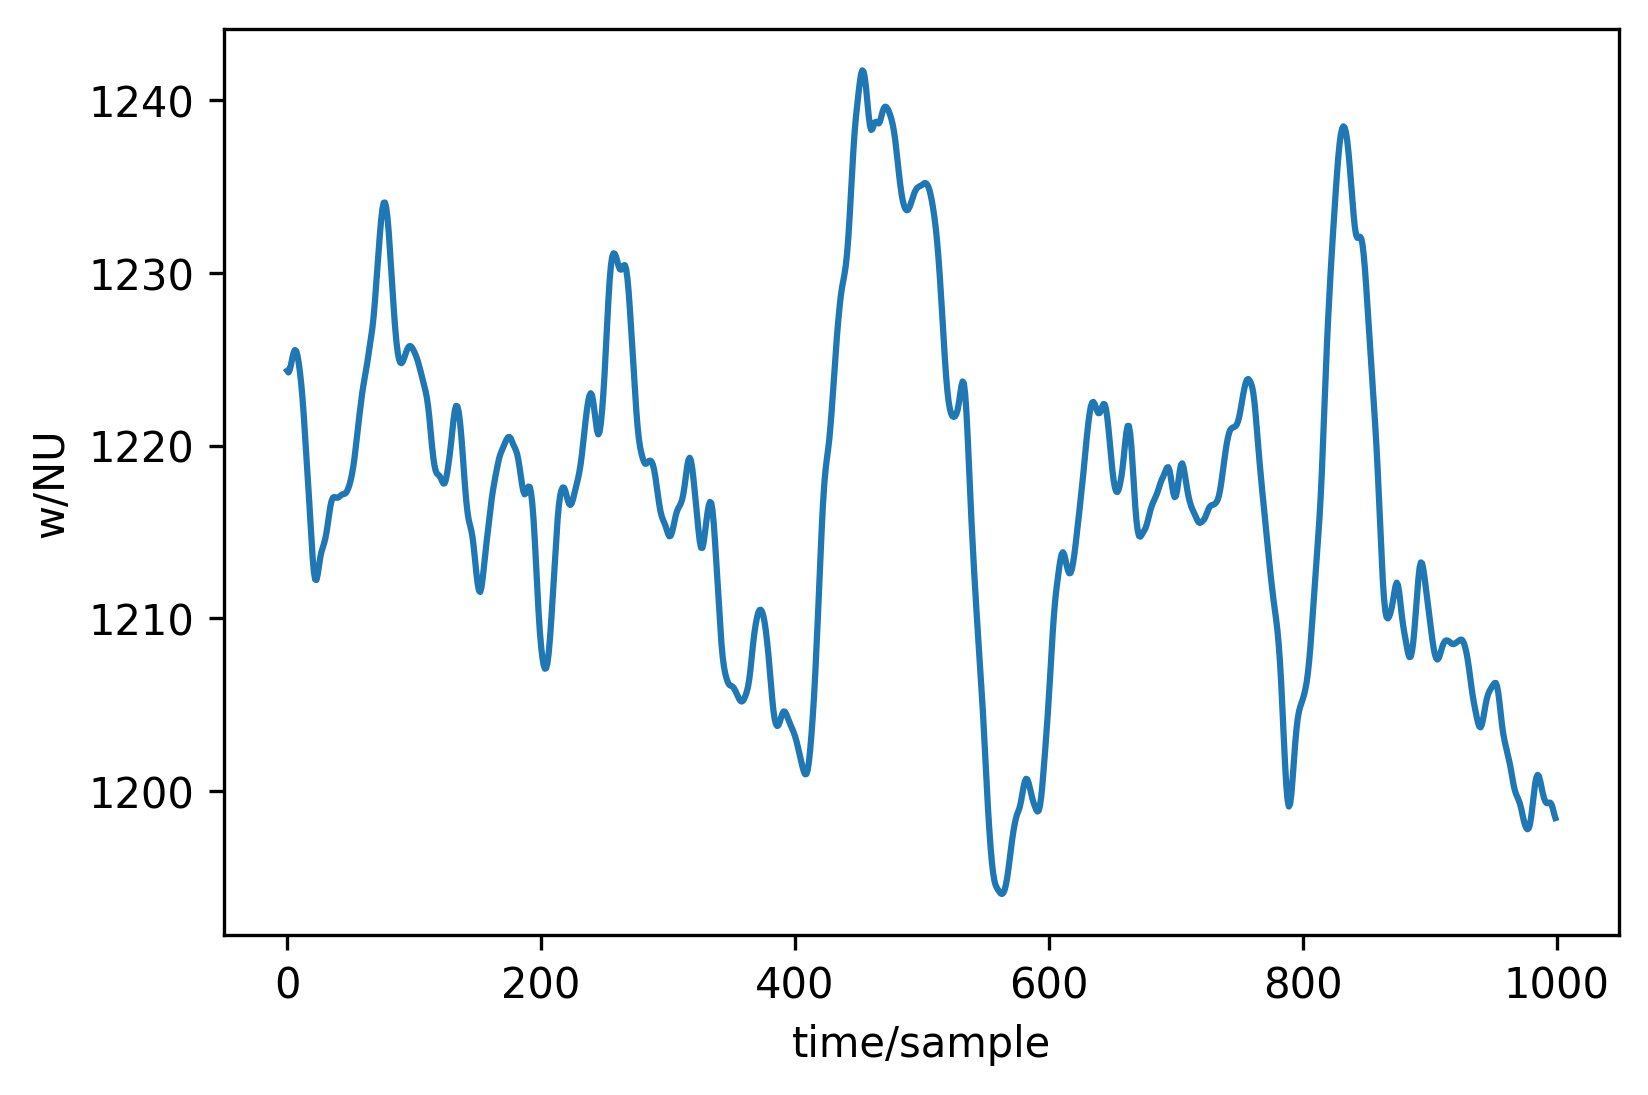

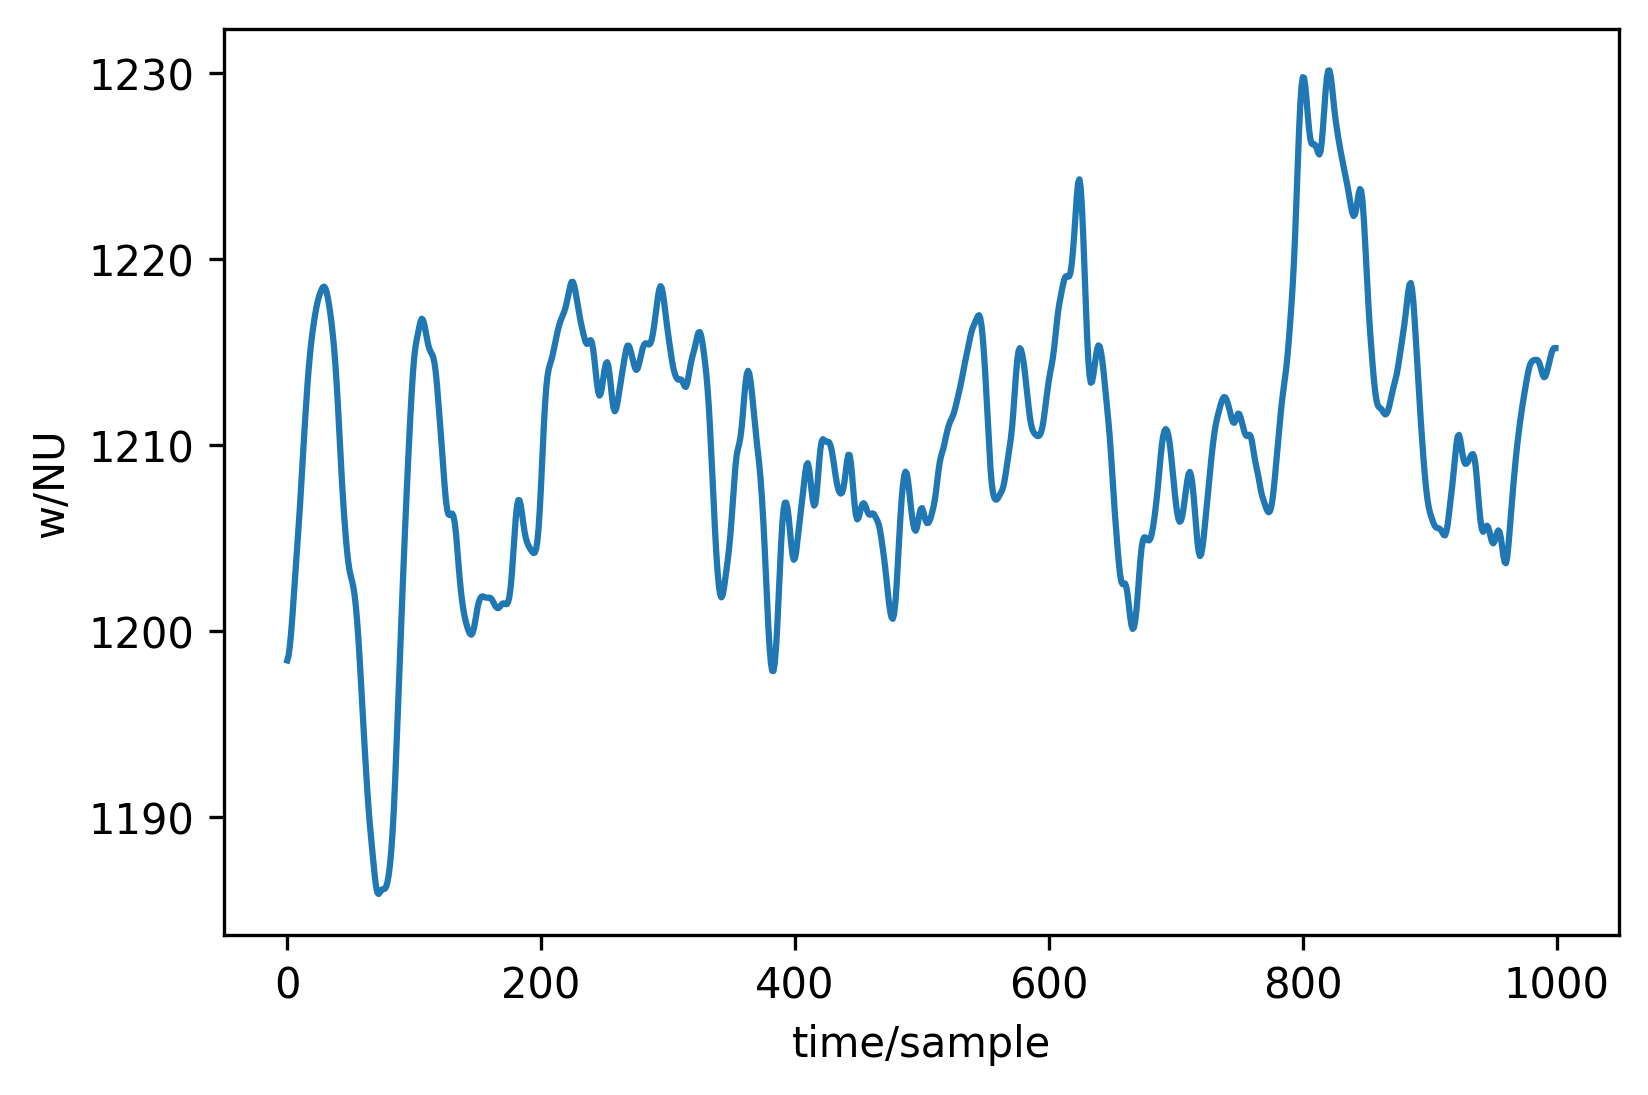

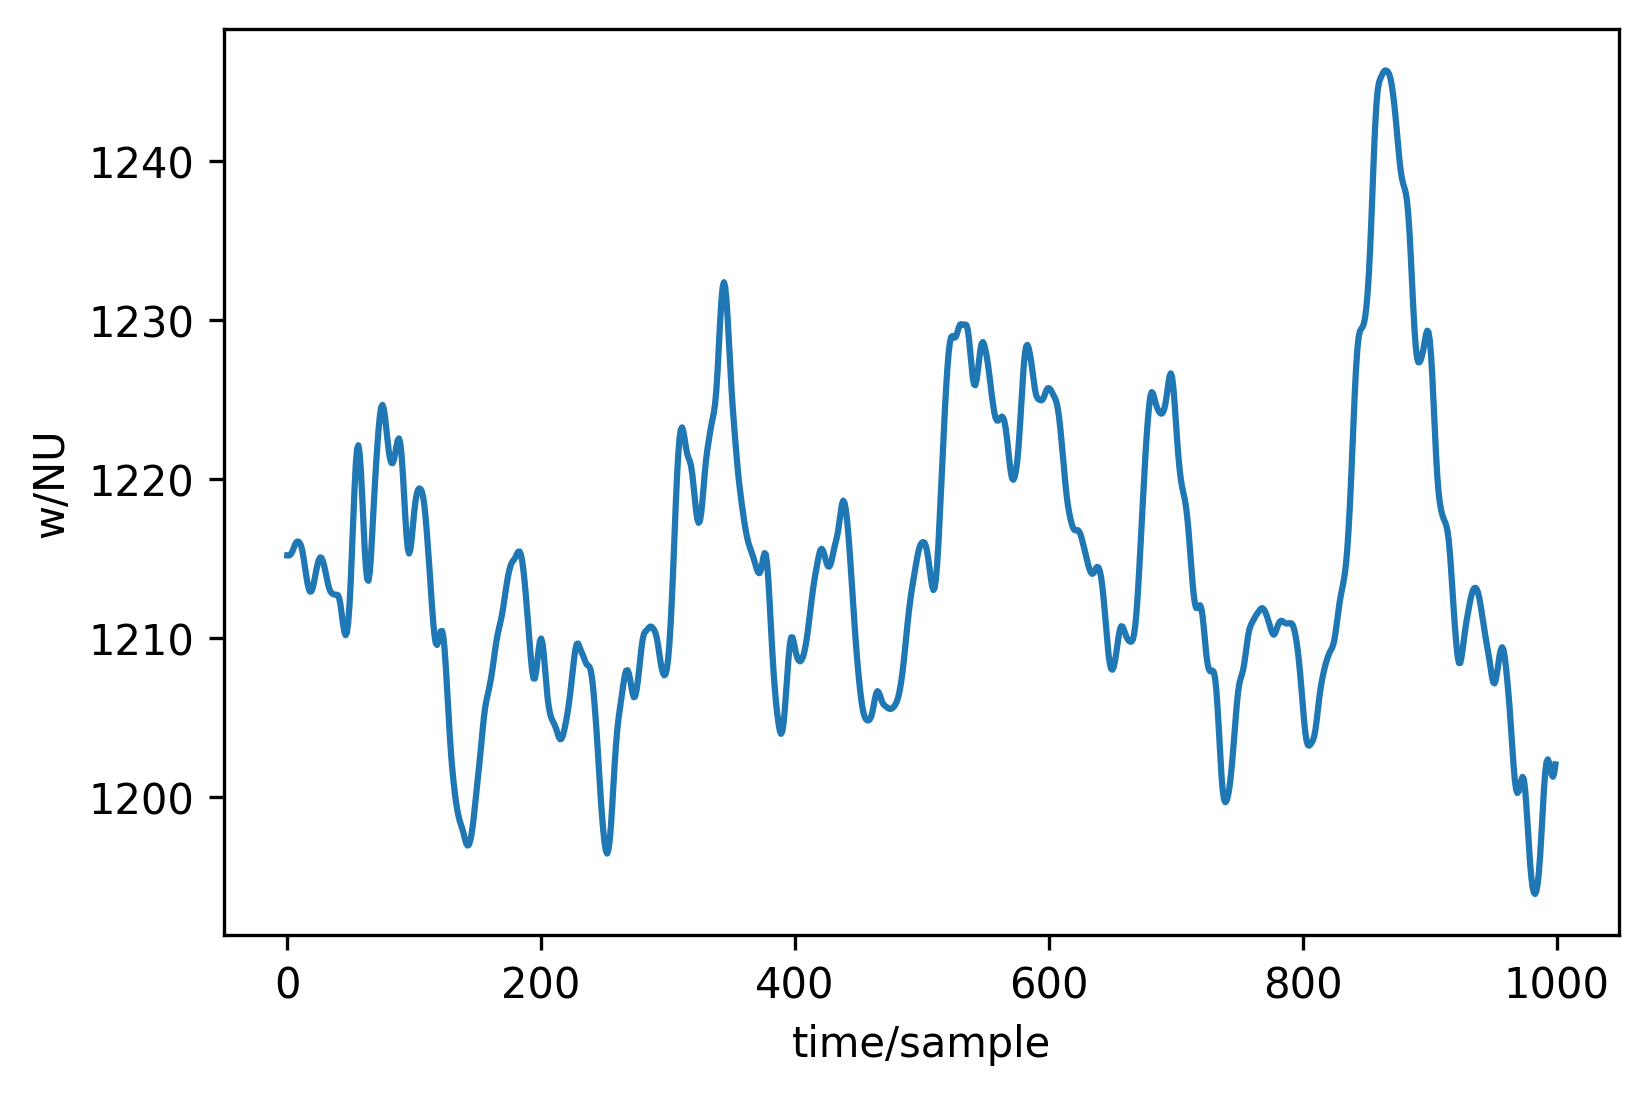

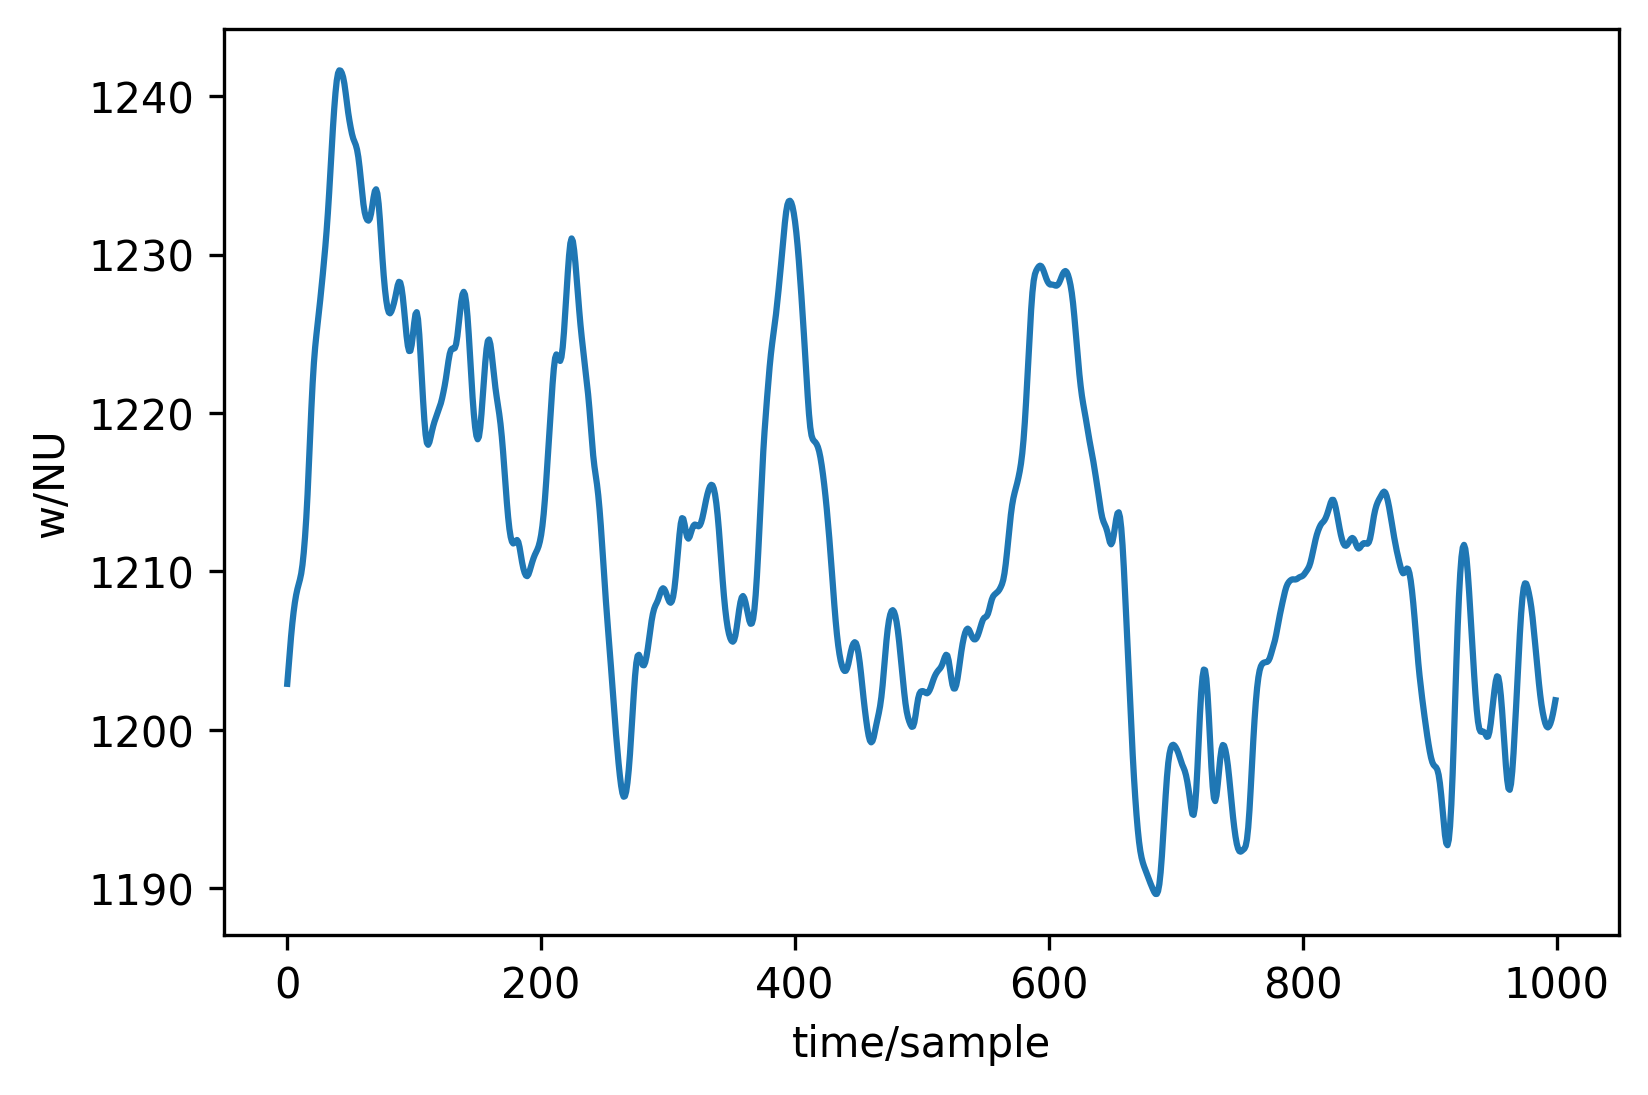

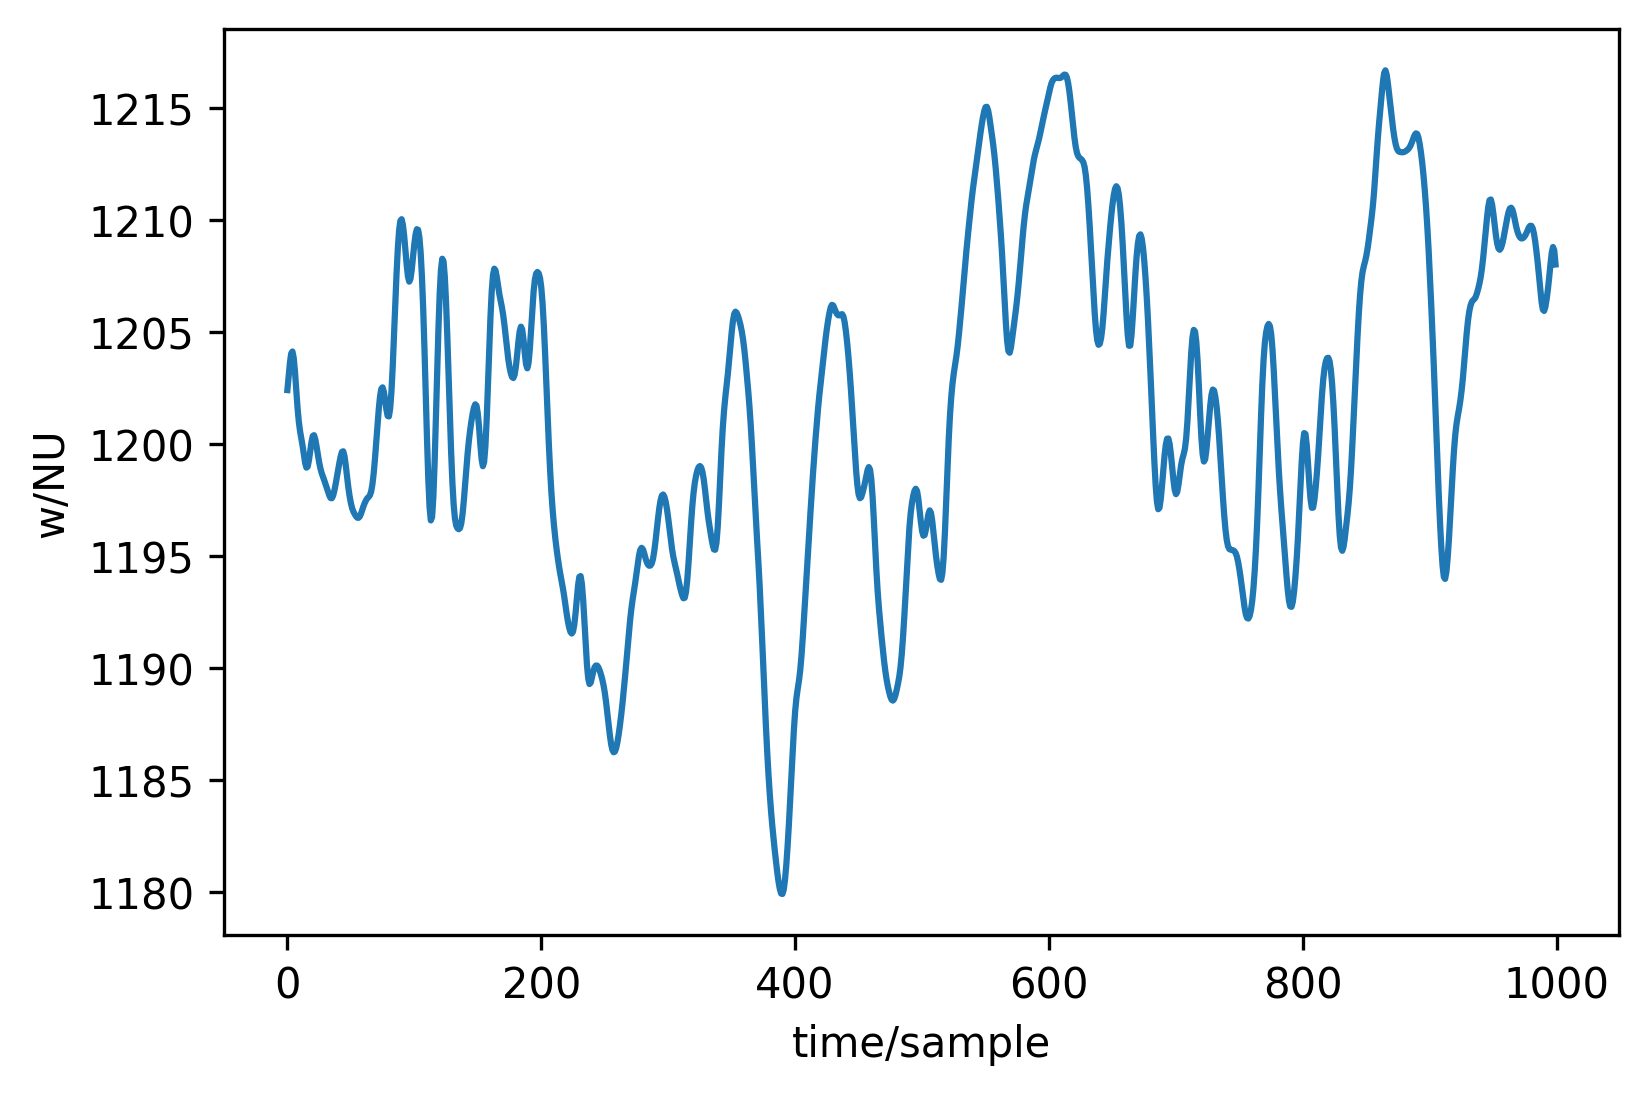

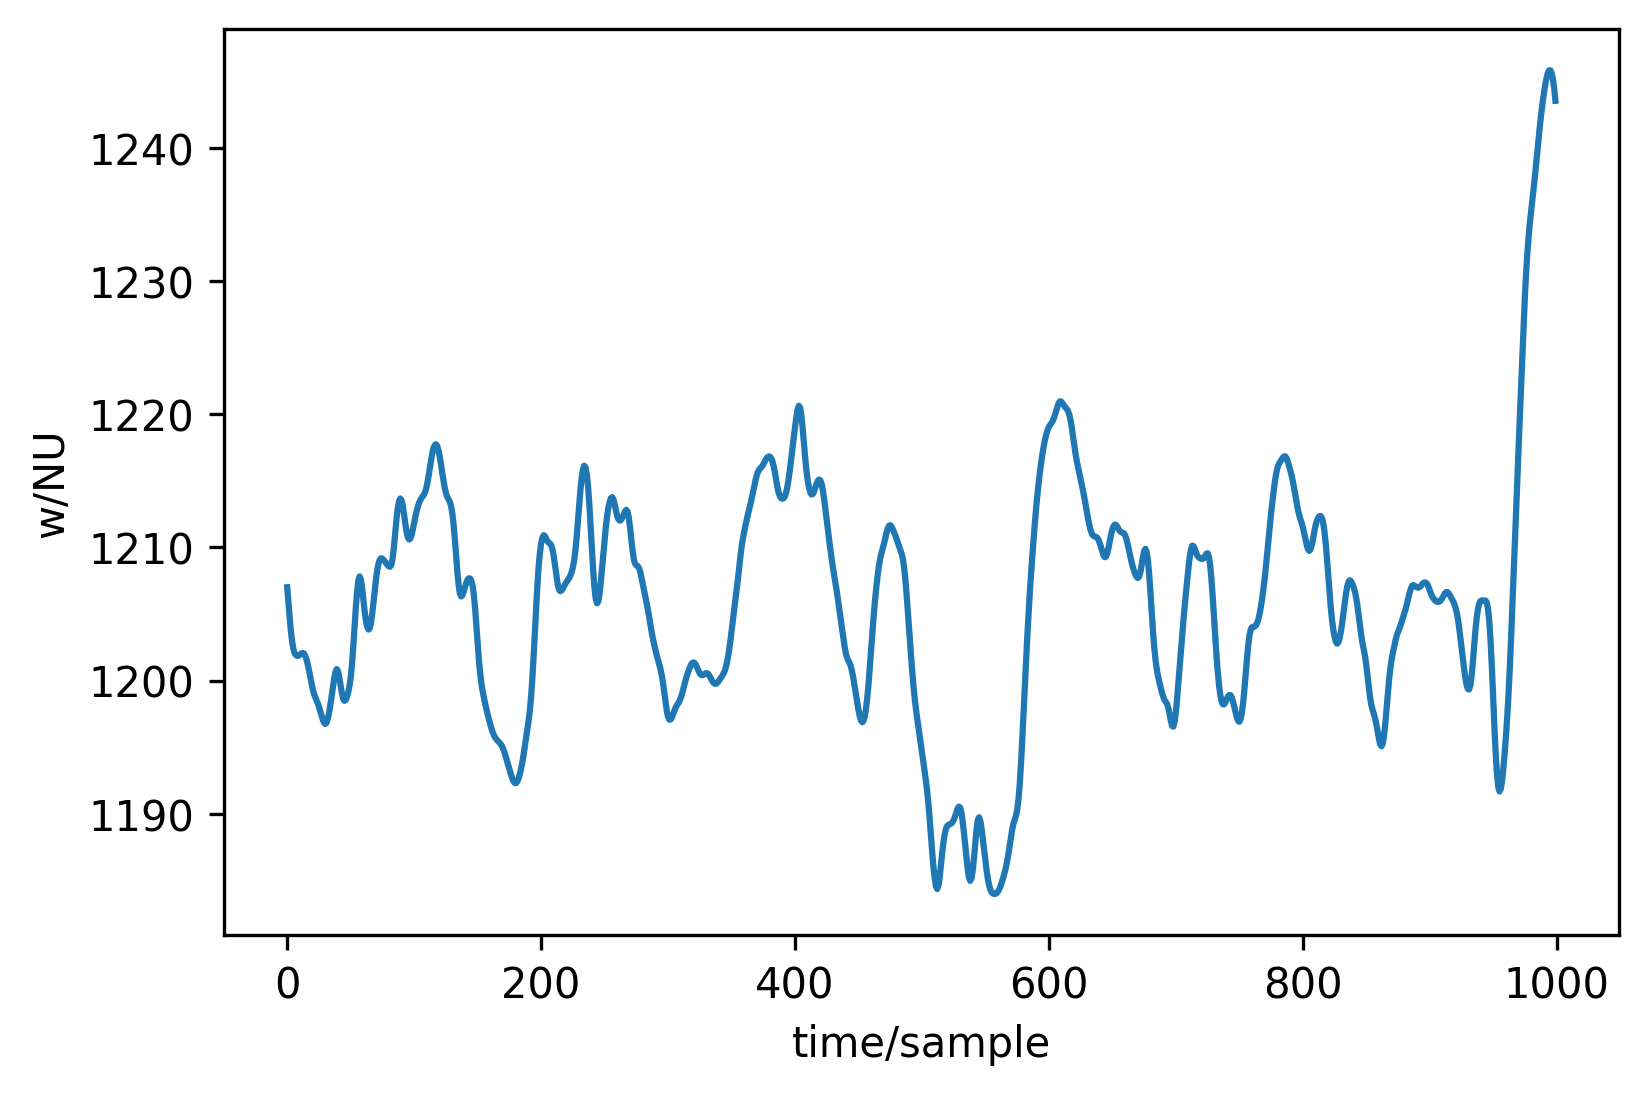

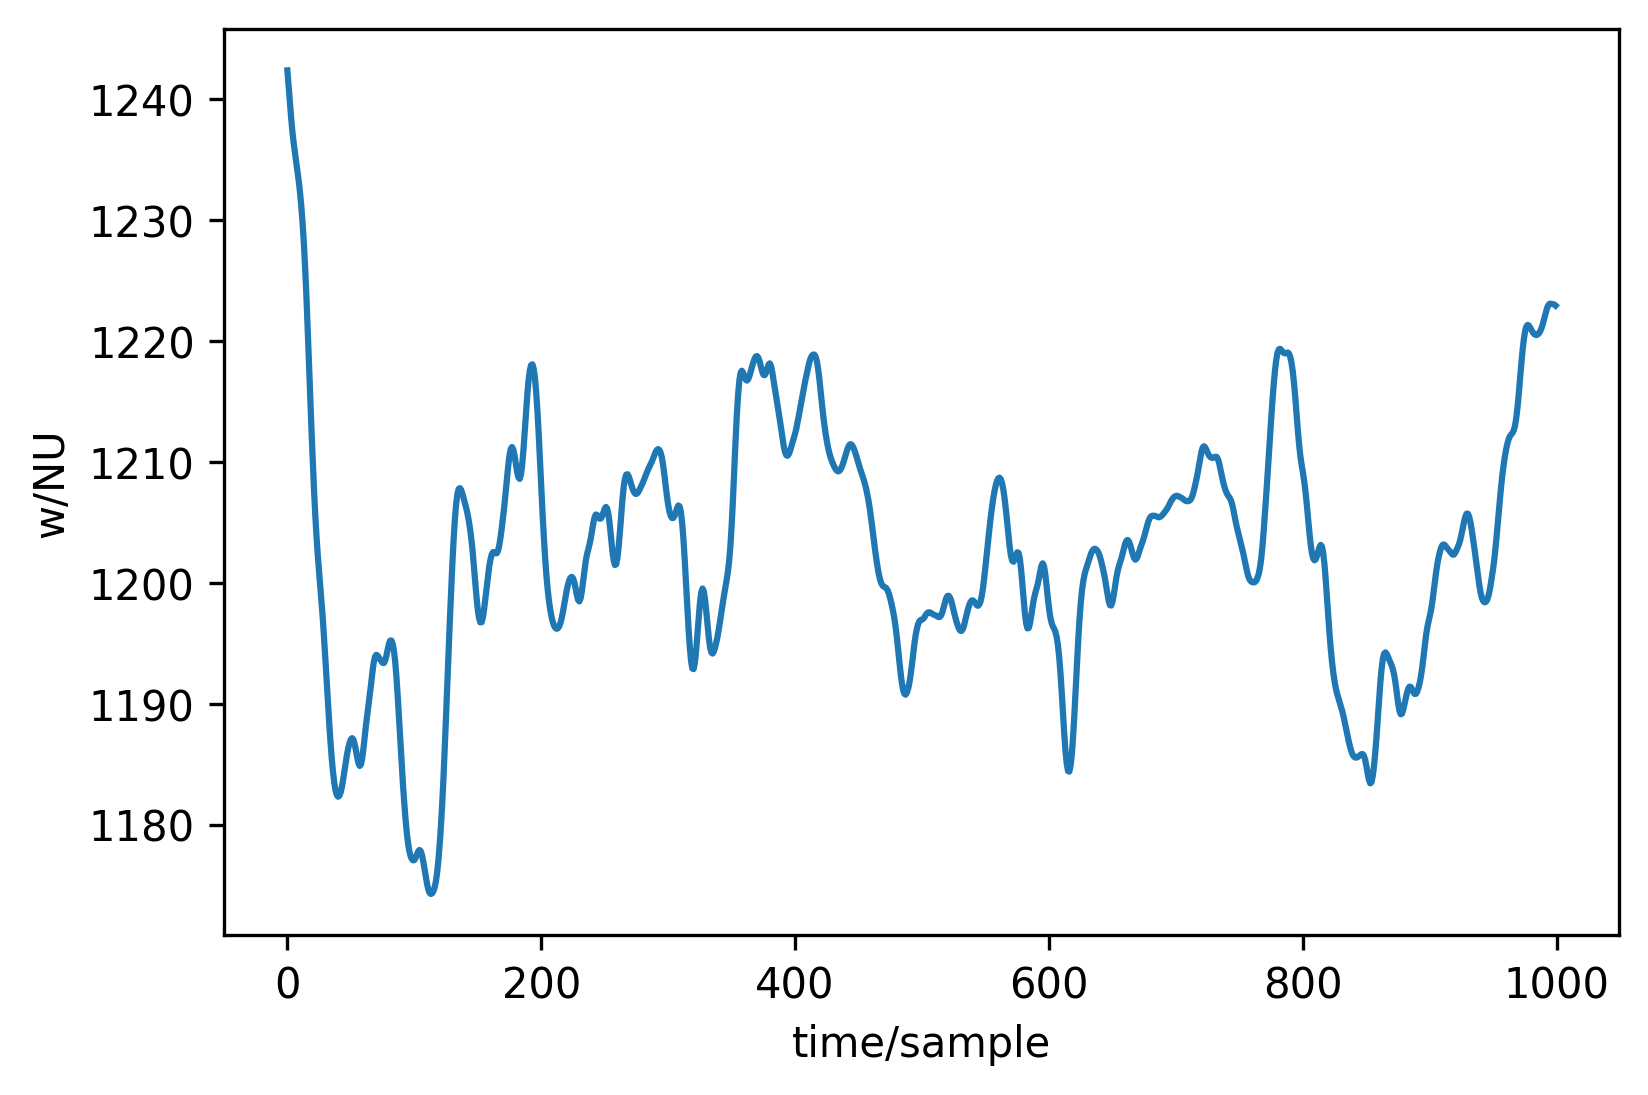

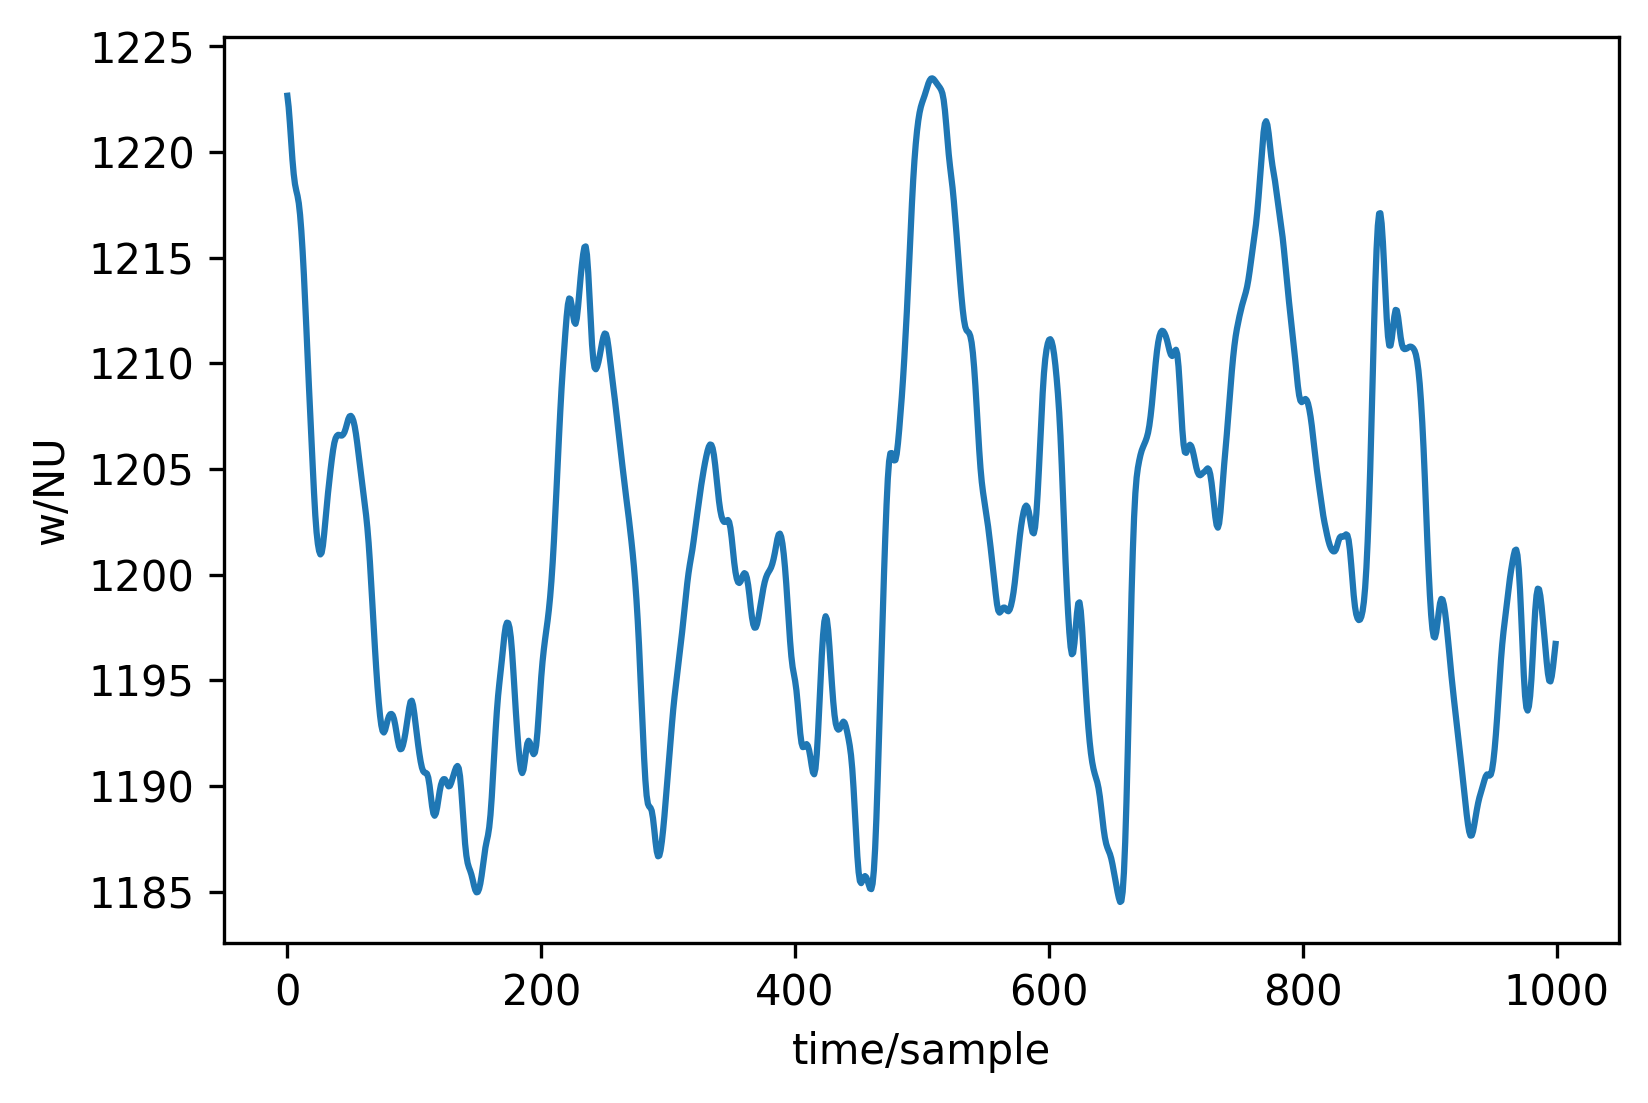

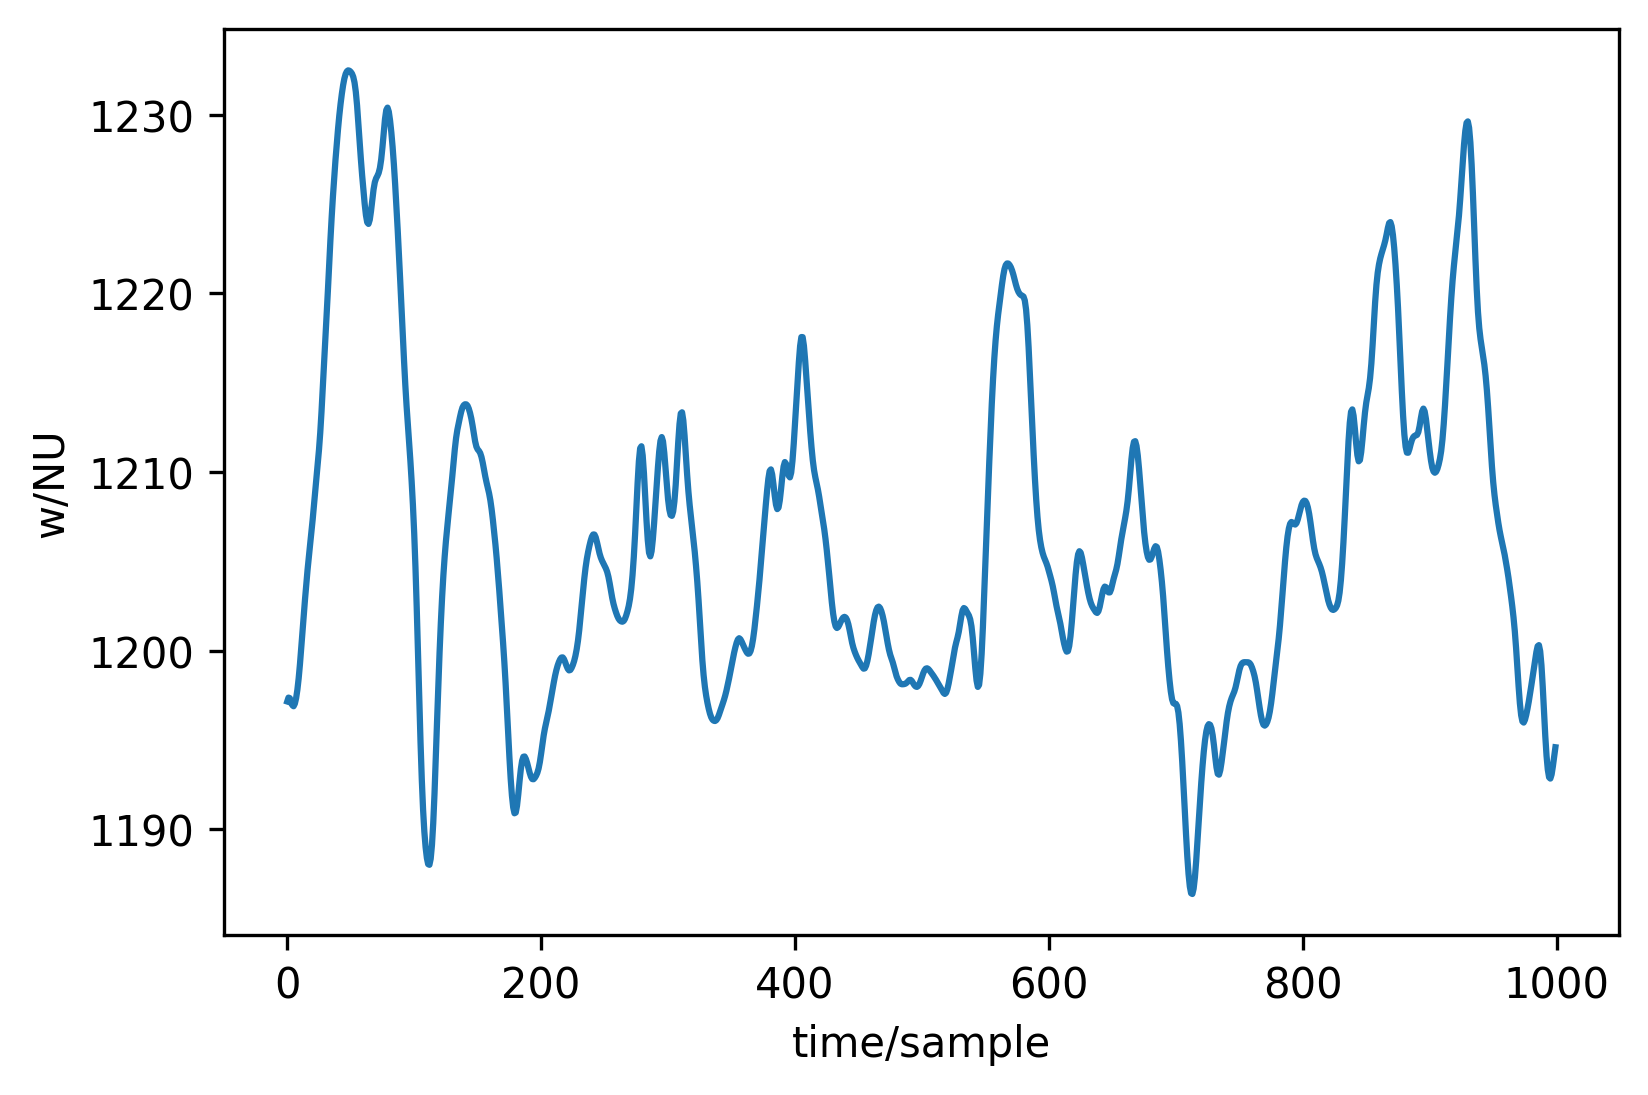

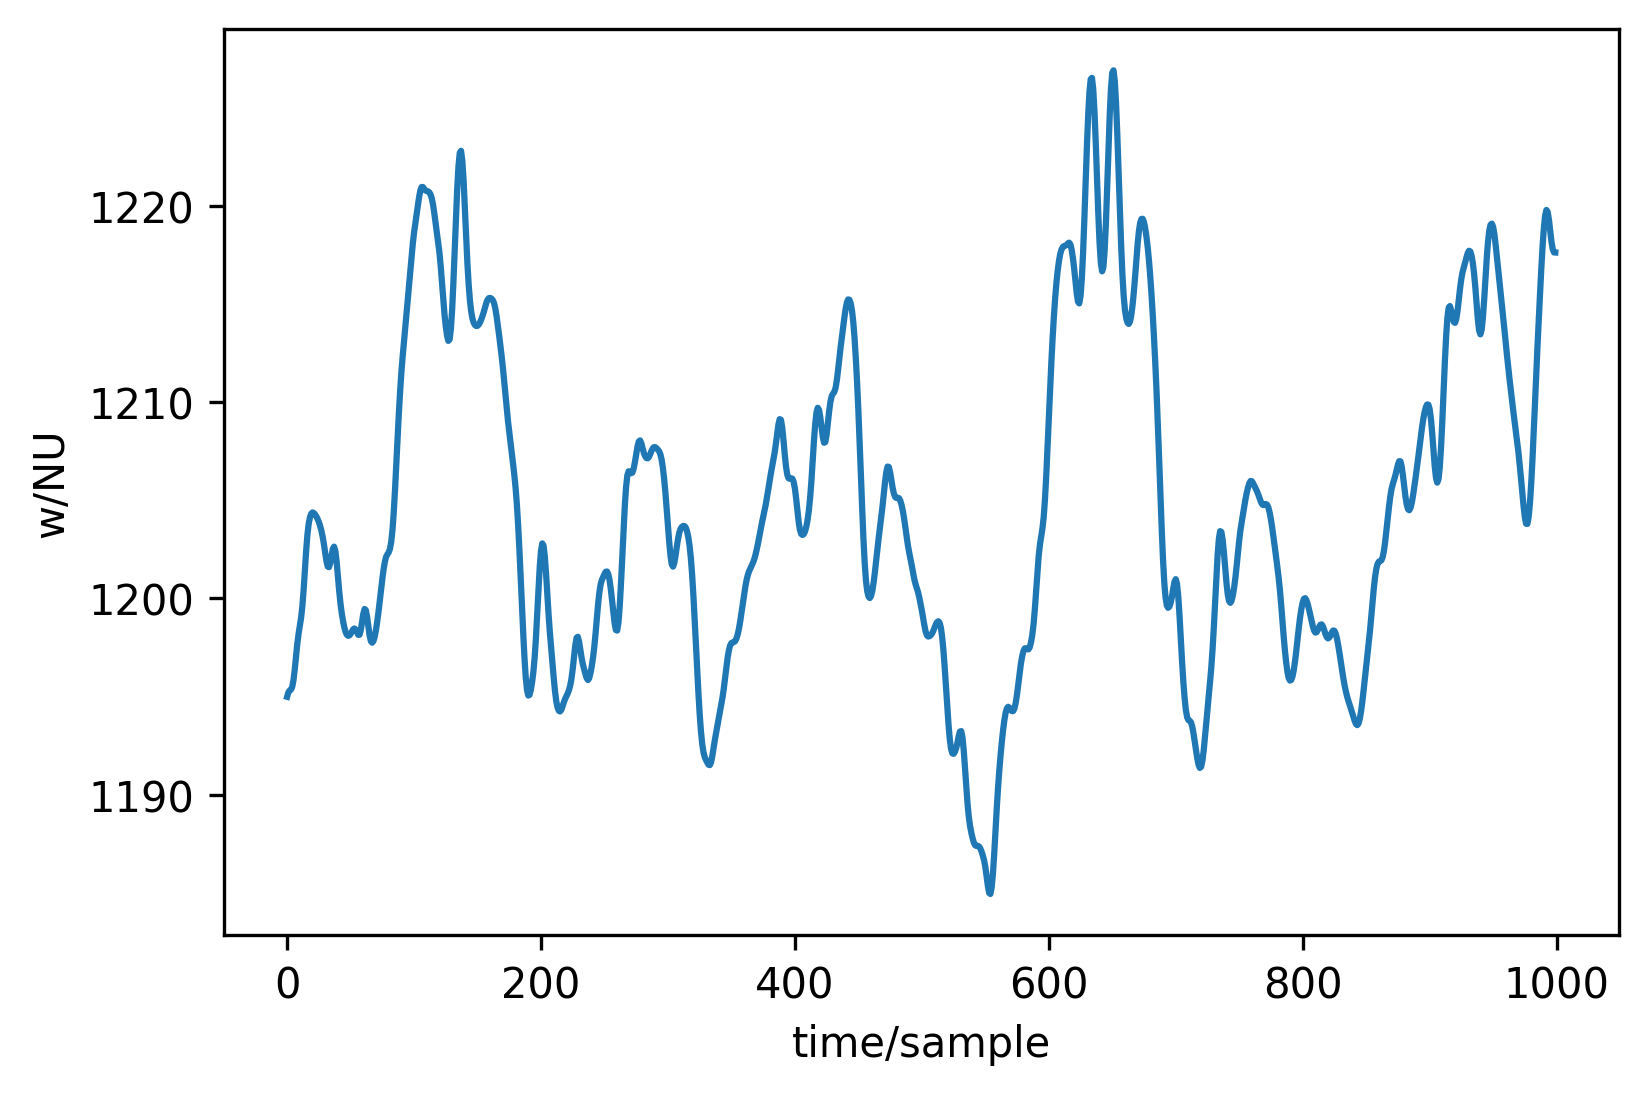

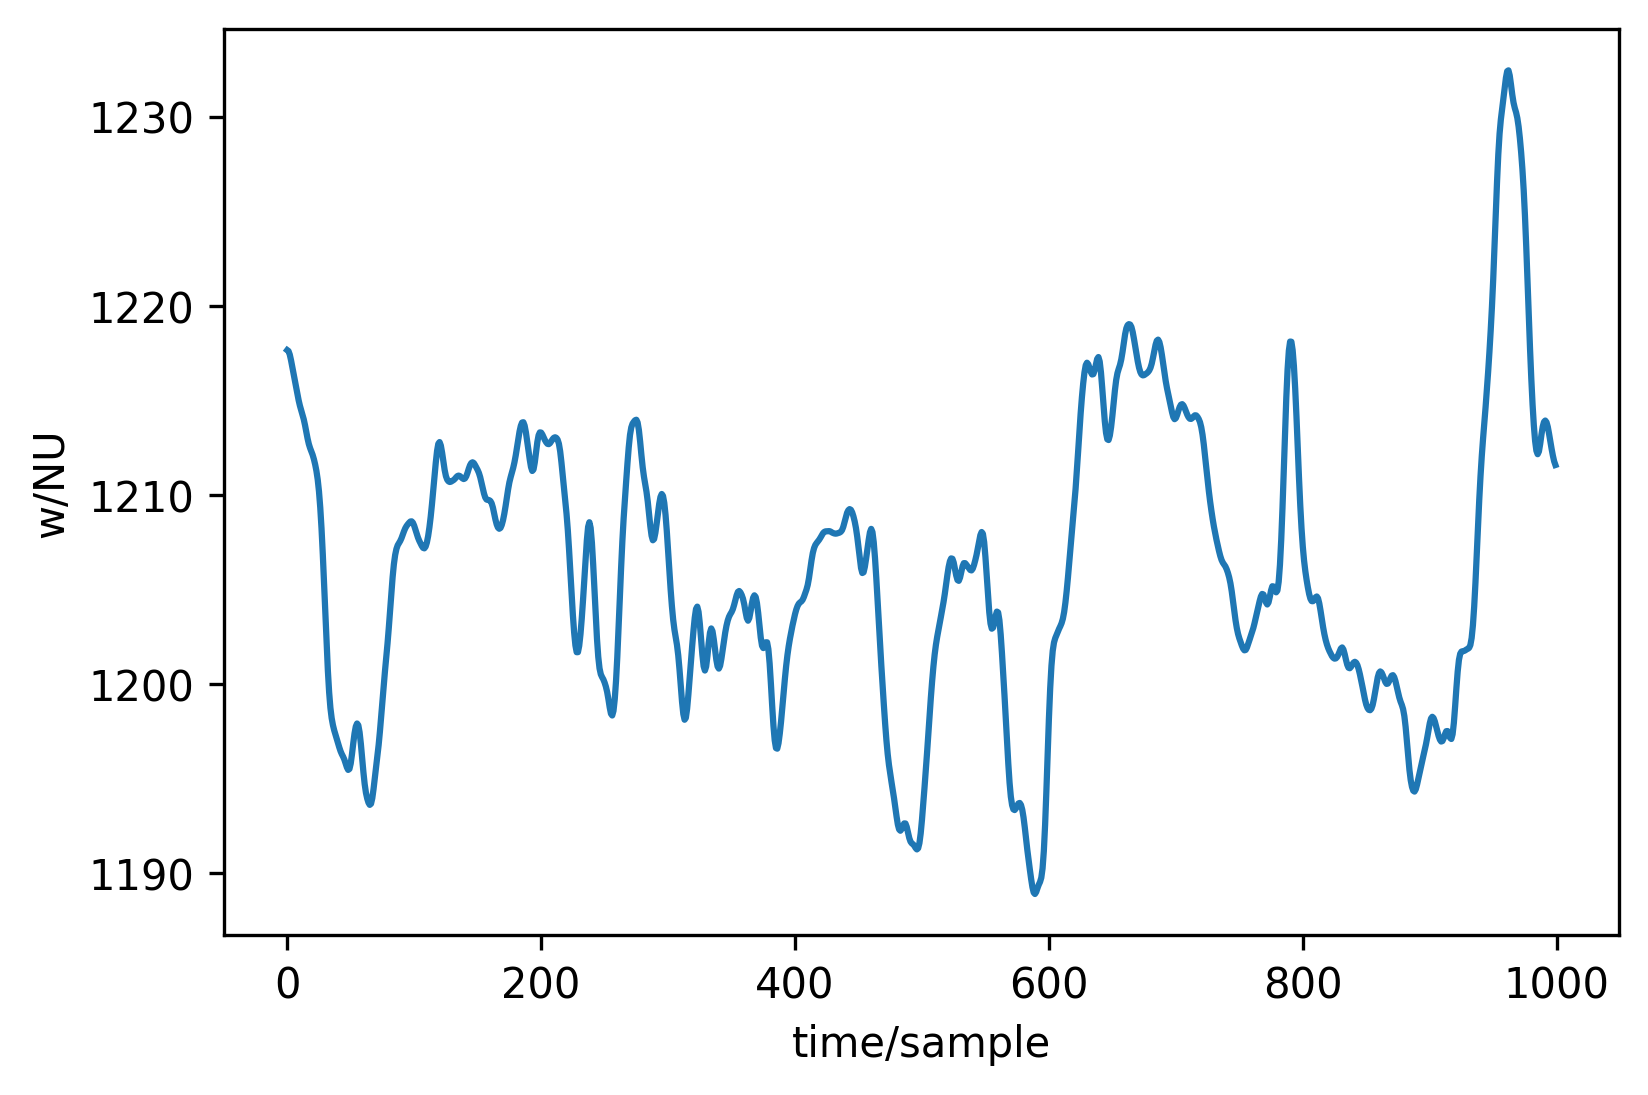

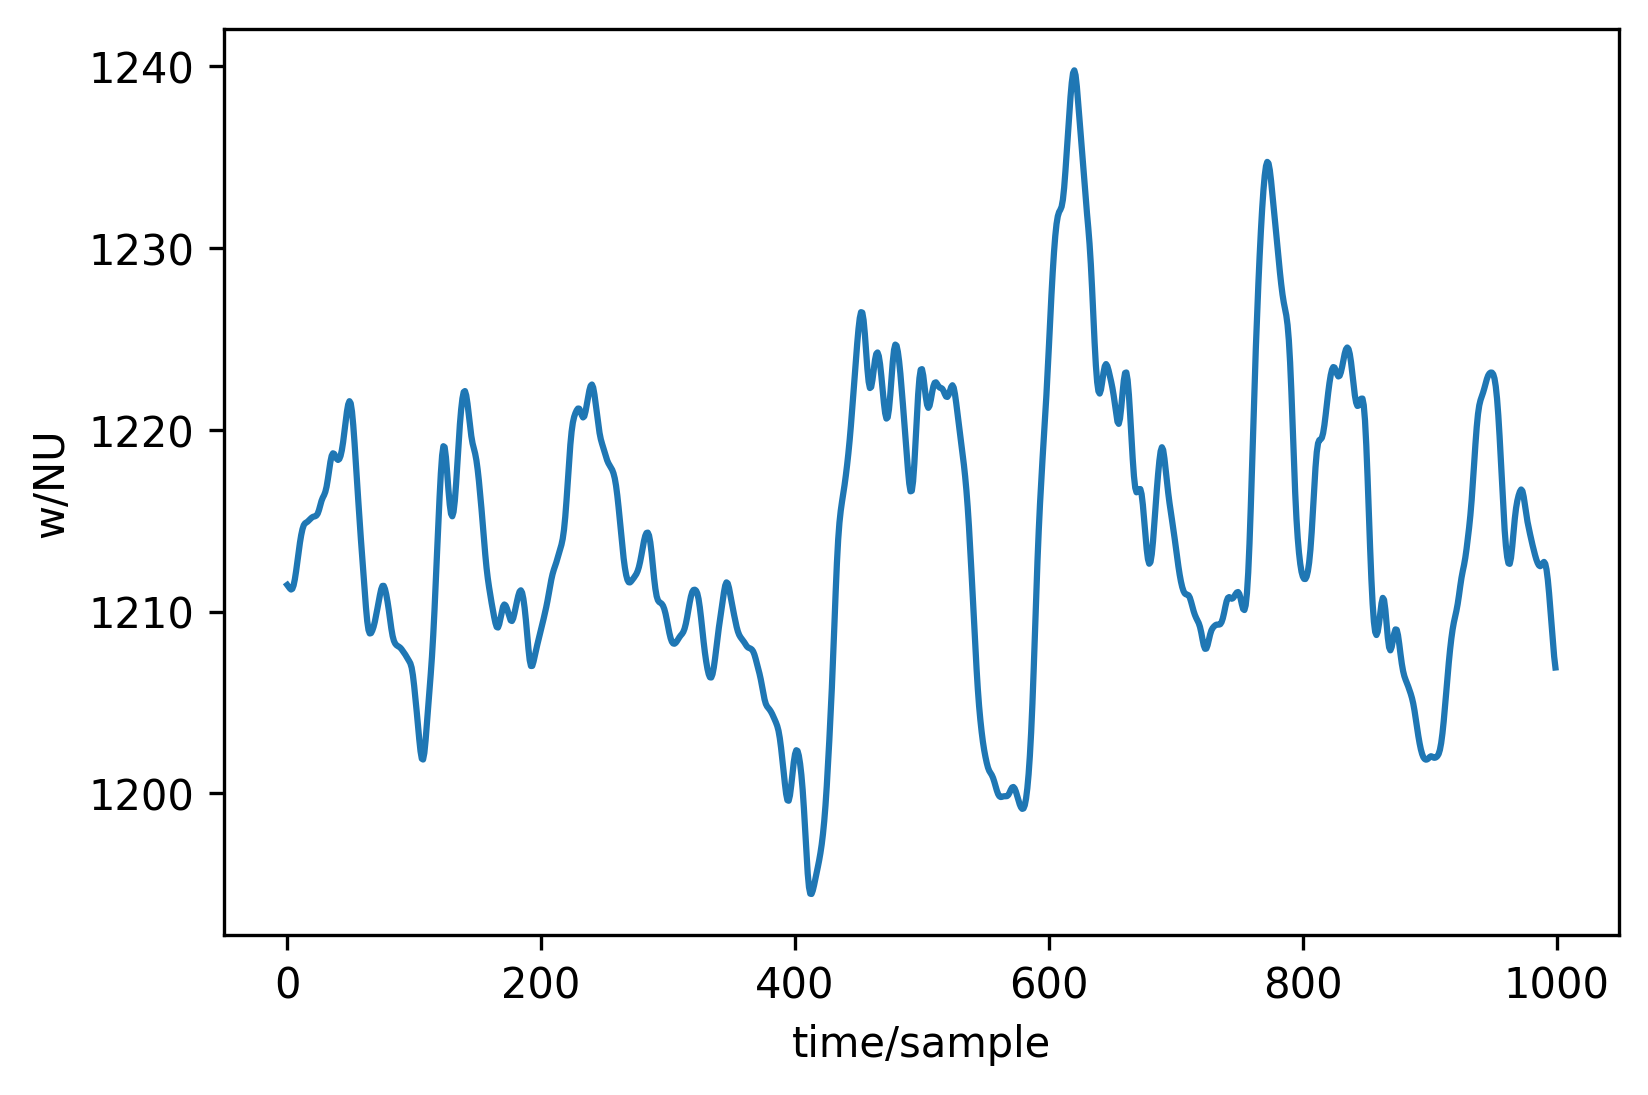

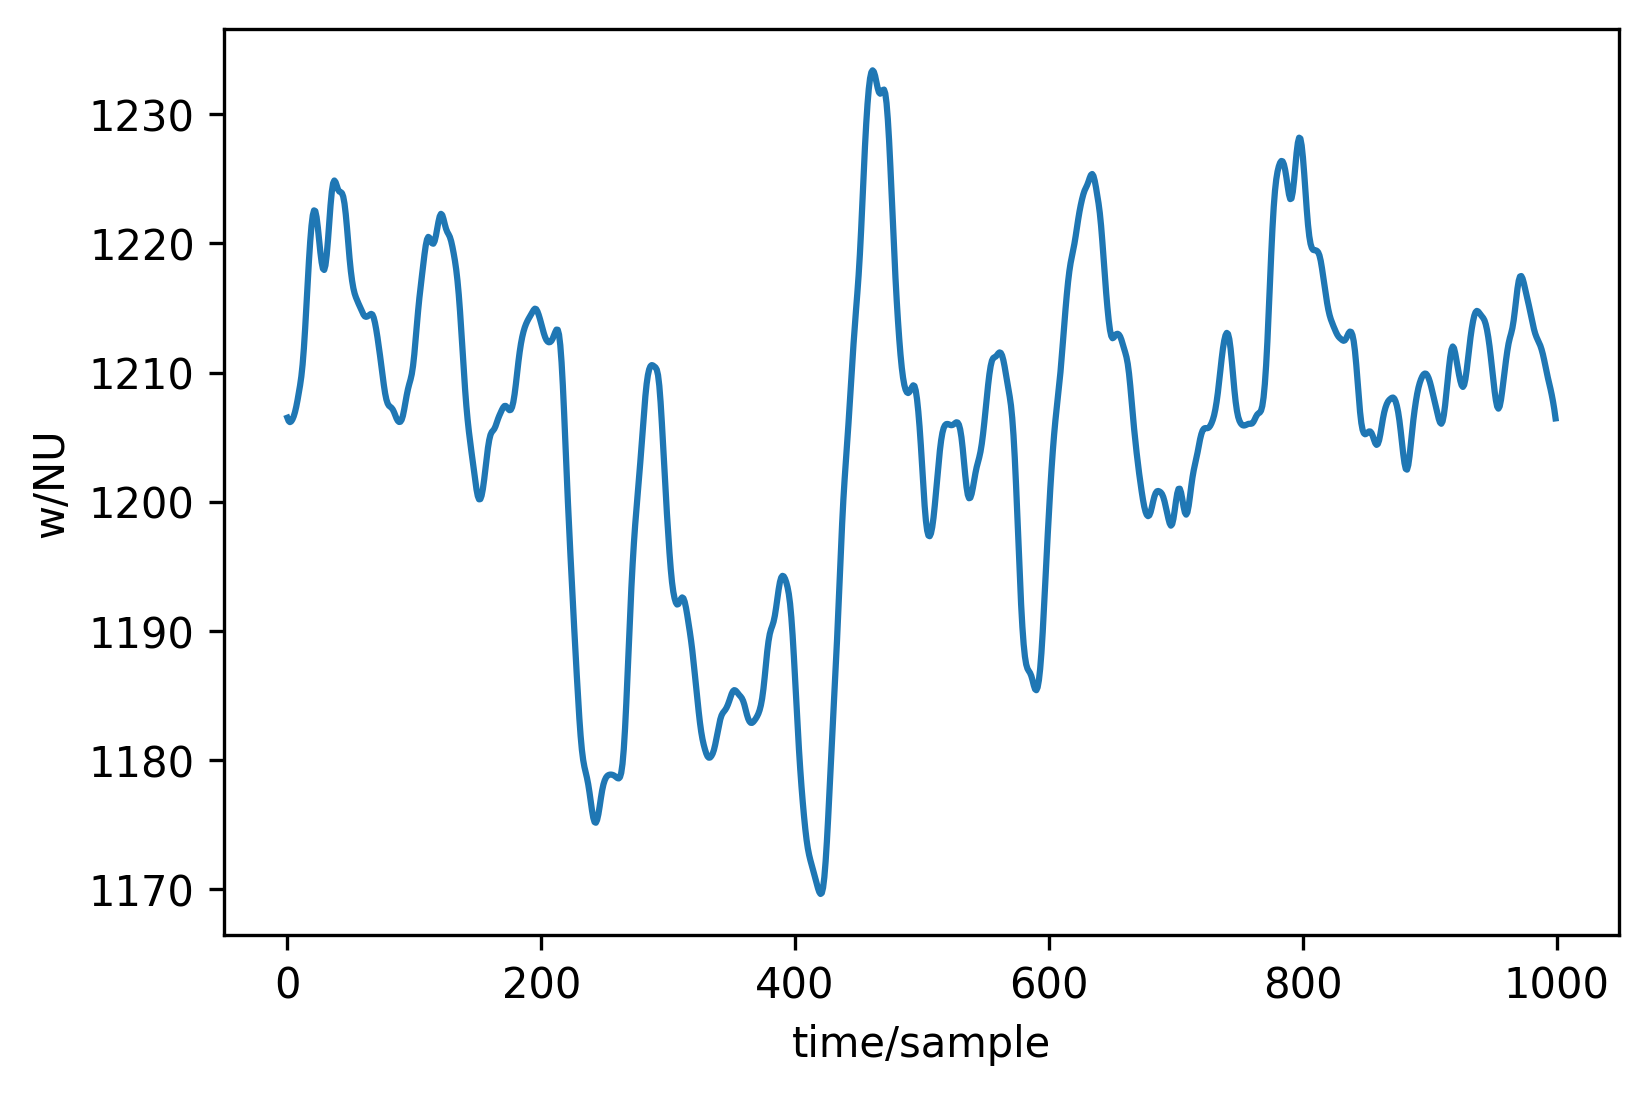

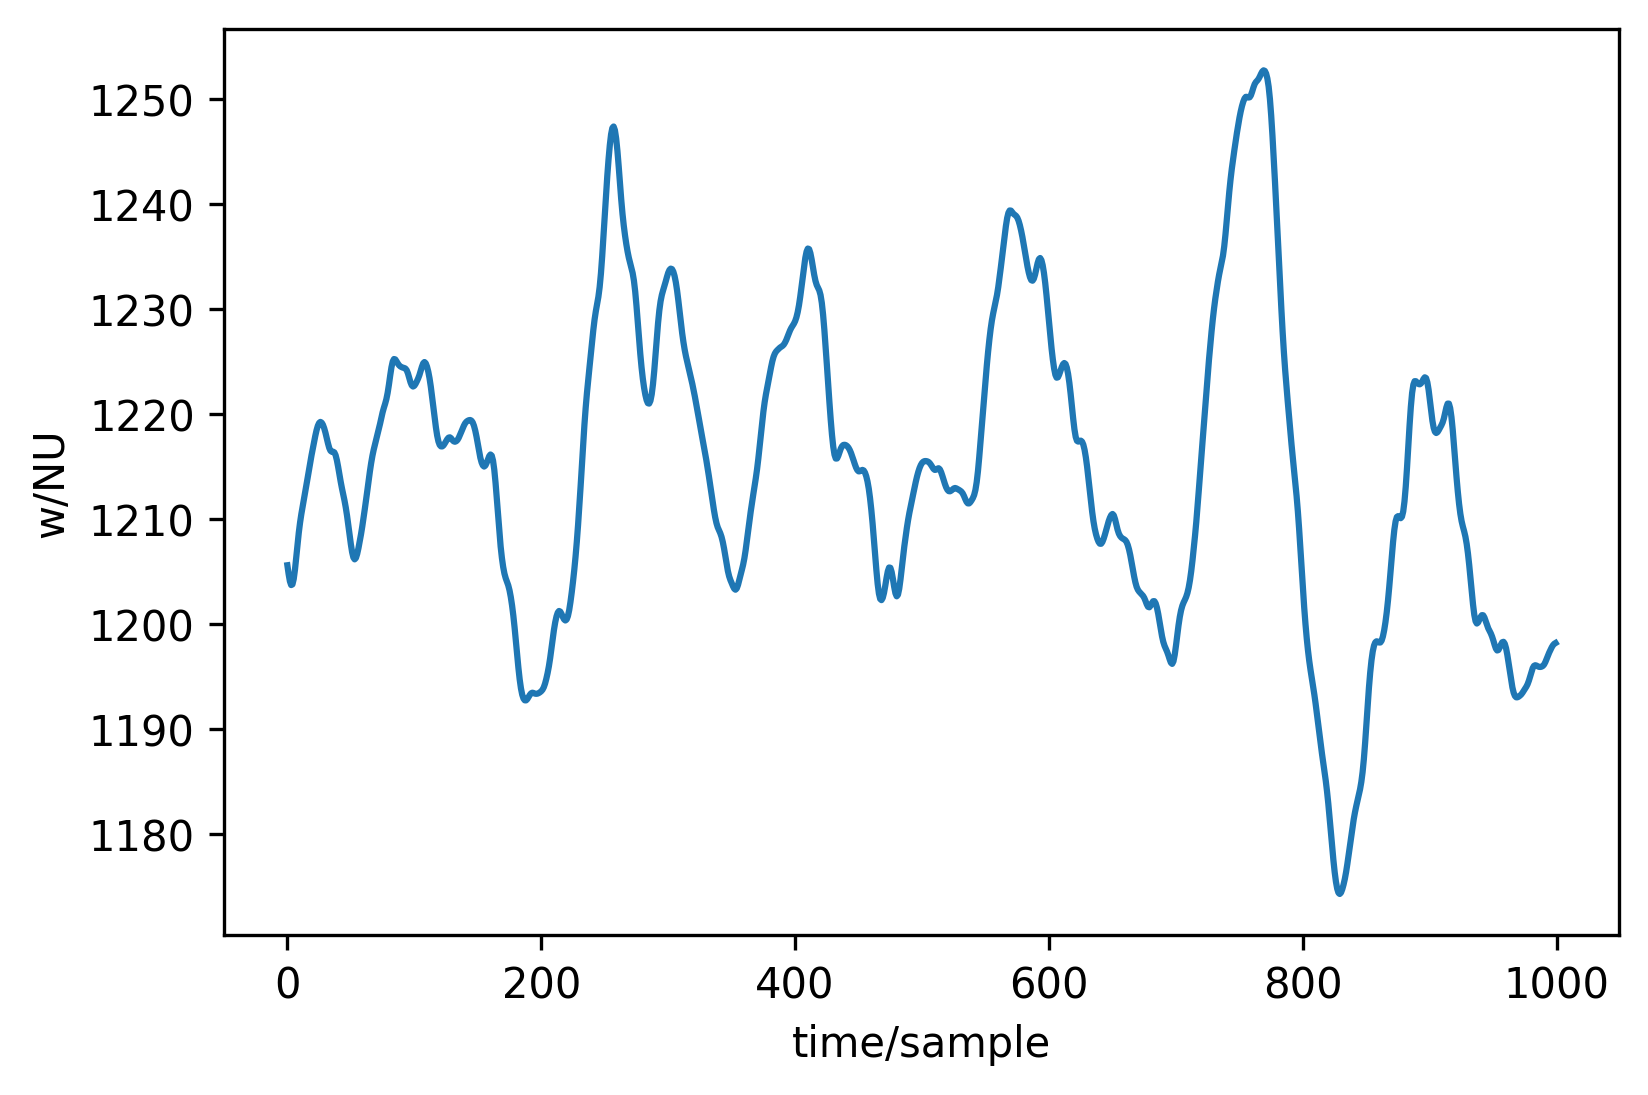

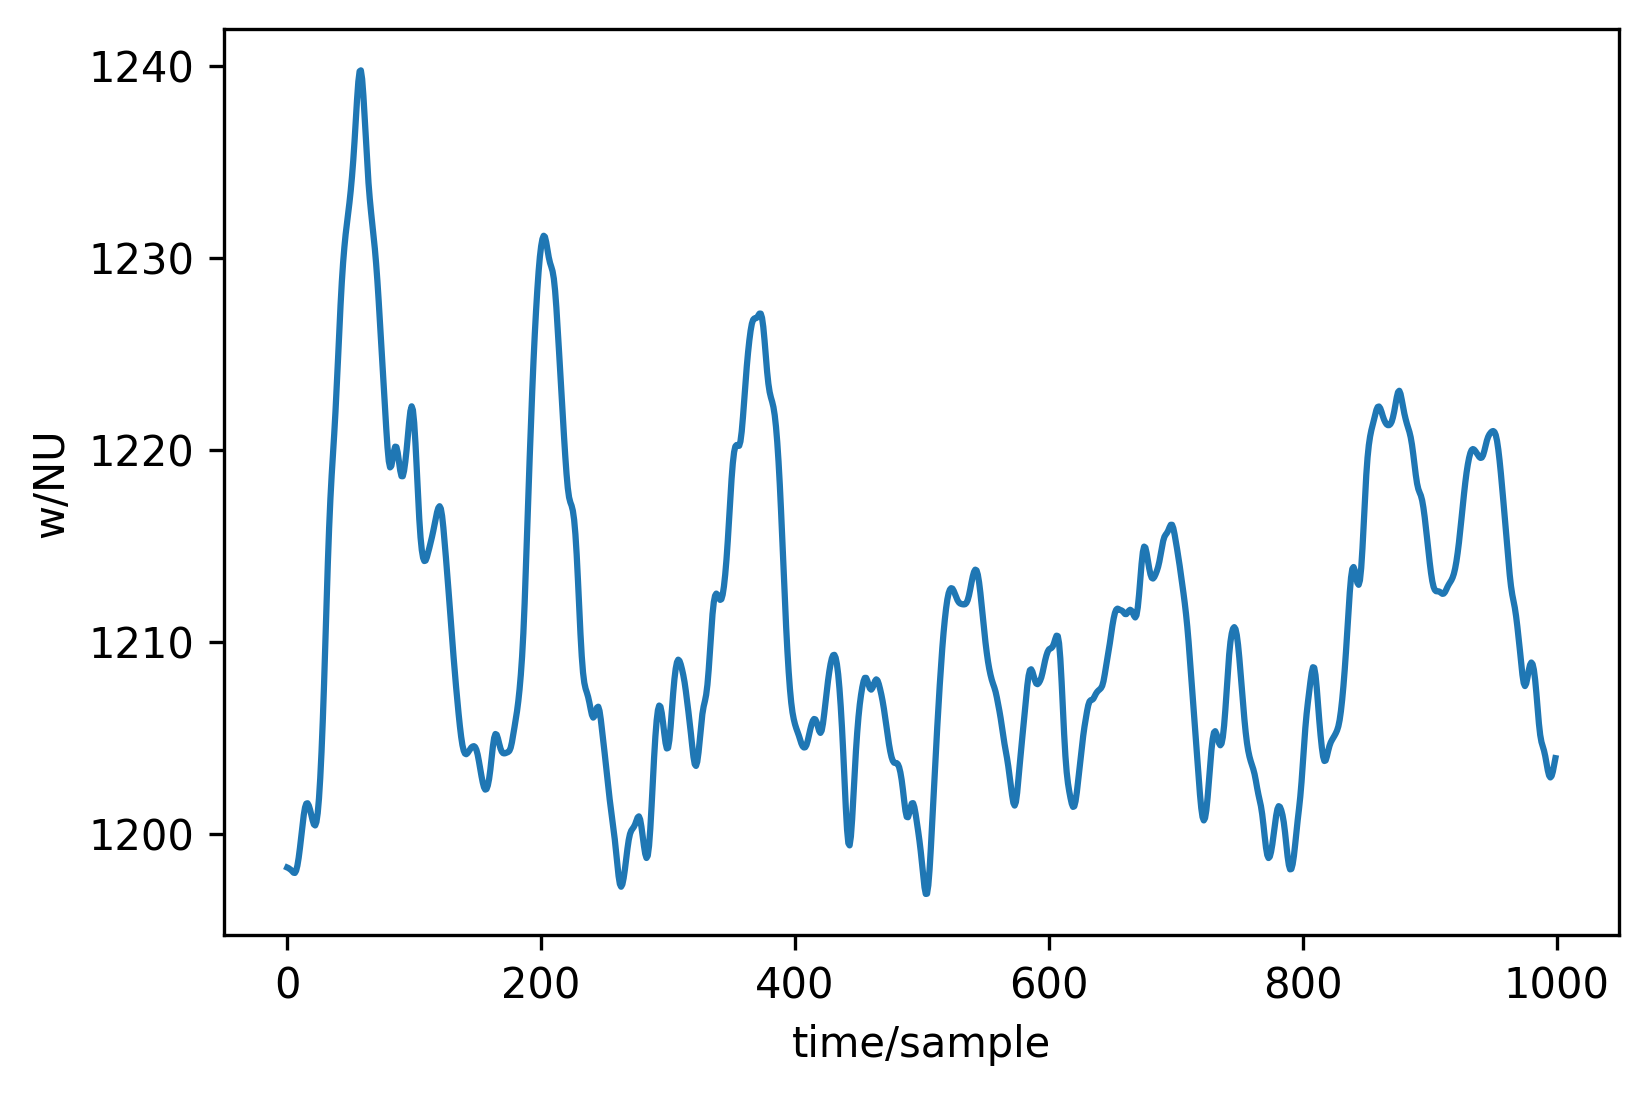

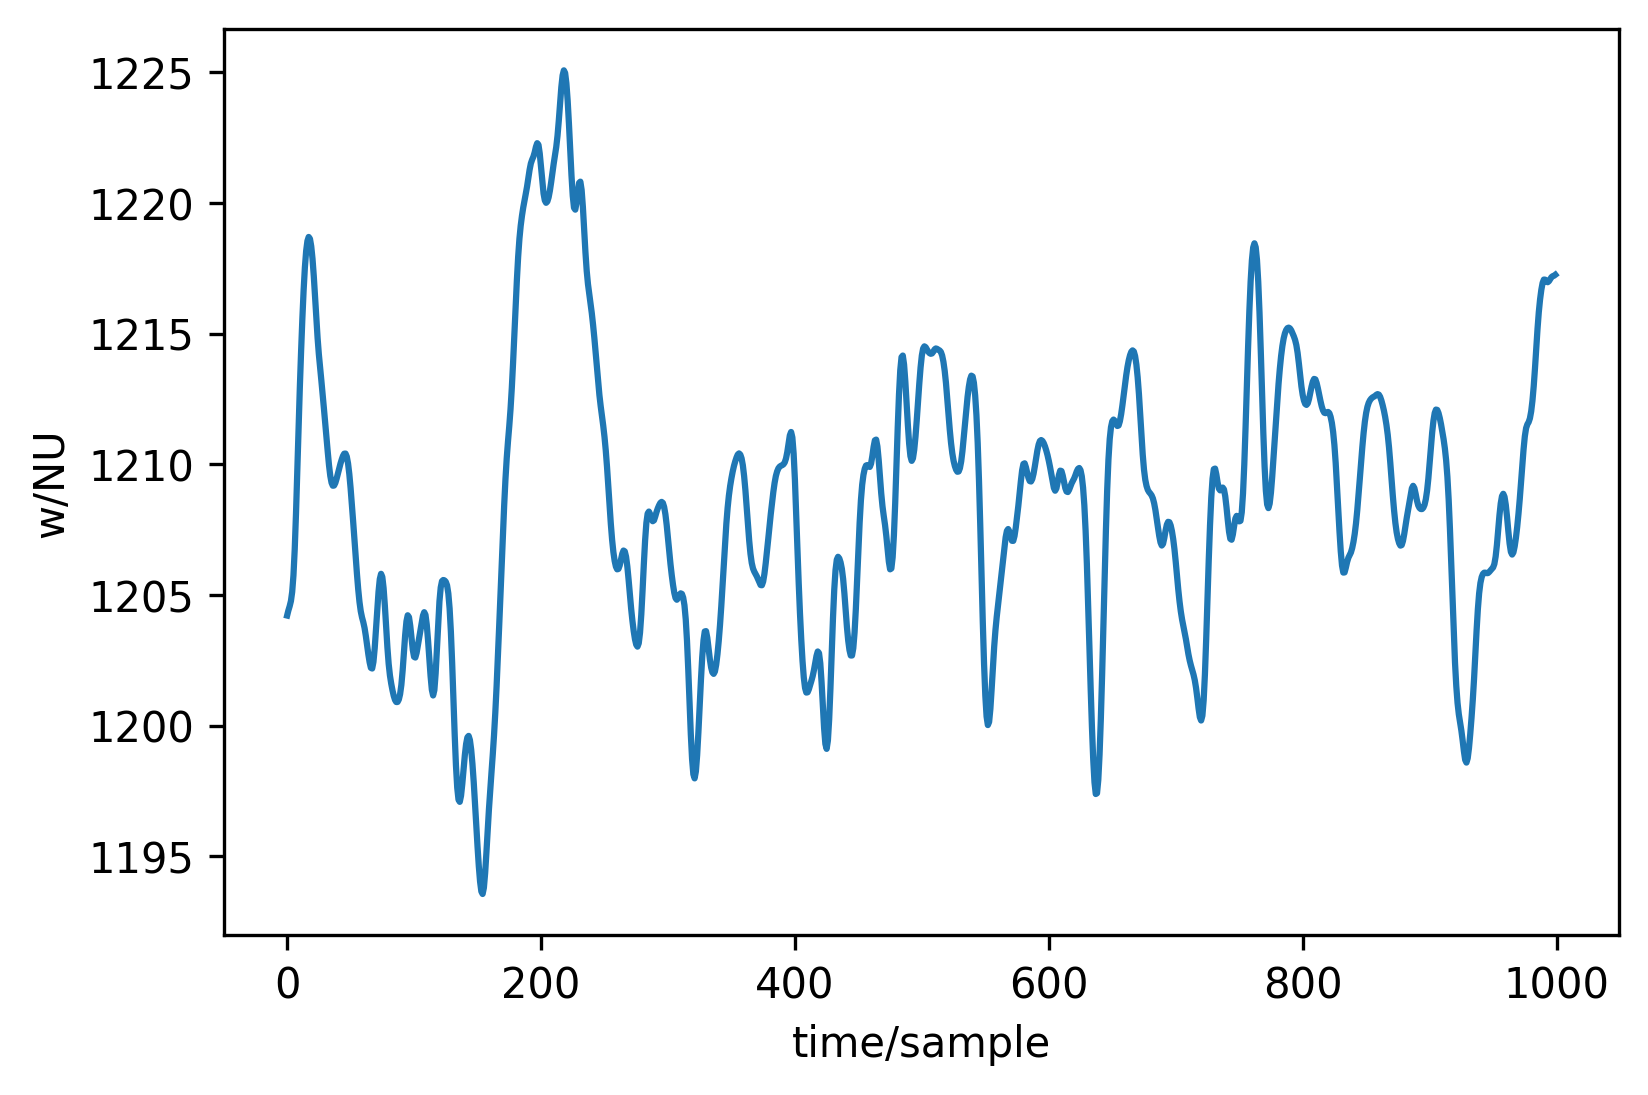

In [121]:
max=150785
max=20000
for i in range(0, max, 1000):
  displaySamples(i)

In [0]:
from scipy import signal

In [0]:
peaks = signal.find_peaks(data)

In [140]:
peaks[0]

array([ 11,  21,  38,  52,  63,  73,  95, 145, 159, 187, 309, 333, 353,
       388, 397, 419, 448, 454, 487, 525, 552, 608, 619, 680, 695, 730,
       739, 773, 787, 824, 842, 859, 887, 900, 937, 946, 983])

In [141]:
!pip install heartpy

     |████████████████████████████████| 1.0MB 2.8MB/s 


In [0]:
import heartpy as hp

array([1217.33066022, 1217.45837822, 1217.60962322, 1217.76086821,
       1217.88858621, 1218.00958221, 1218.17091021, 1218.43642921,
       1218.8431102 , 1219.3237332 , 1219.74385819, 1219.93879619,
       1219.81443919, 1219.3506212 , 1218.6179232 , 1217.76086821,
       1216.93742322, 1216.24841823, 1215.74762923, 1215.45858324,
       1215.37119724, 1215.38800224, 1215.35775324, 1215.18634224,
       1214.87040824, 1214.49061525, 1214.12426625, 1213.81841525,
       1213.60331126, 1213.53609126, 1213.62011626, 1213.79488826,
       1213.99990925, 1214.18812525, 1214.33600925, 1214.46708825,
       1214.61497225, 1214.77630024, 1214.89057424, 1214.87713024,
       1214.67547025, 1214.29567725, 1213.83185925, 1213.41509526,
       1213.17310326, 1213.17310326, 1213.41173426, 1213.81505425,
       1214.31248225, 1214.82335424, 1215.26700624, 1215.55269124,
       1215.64343824, 1215.58630124, 1215.46866624, 1215.33086524,
       1215.20986924, 1215.13928824, 1215.11576124, 1215.08887

In [0]:
type="s1_walk"

In [179]:

fullDataRecord = record = wfdb.rdrecord(type, pb_dir='wrist')
fullData = fullDataRecord.p_signal[:,0]
fullData.shape

(150529,)

In [190]:
sample_rate = hp.get_samplerate_mstimer(timer)

IndexError: ignored

In [185]:
sample_rate

402800.0

In [0]:
data, timer = hp.load_exampledata(1)

In [194]:
len(data)

15000

In [183]:
hp.process(fullData, sample_rate=256.0)

BadSignalWarning: ignored

# HeartPy

In [0]:
import heartpy as hp
import matplotlib.pyplot as plt

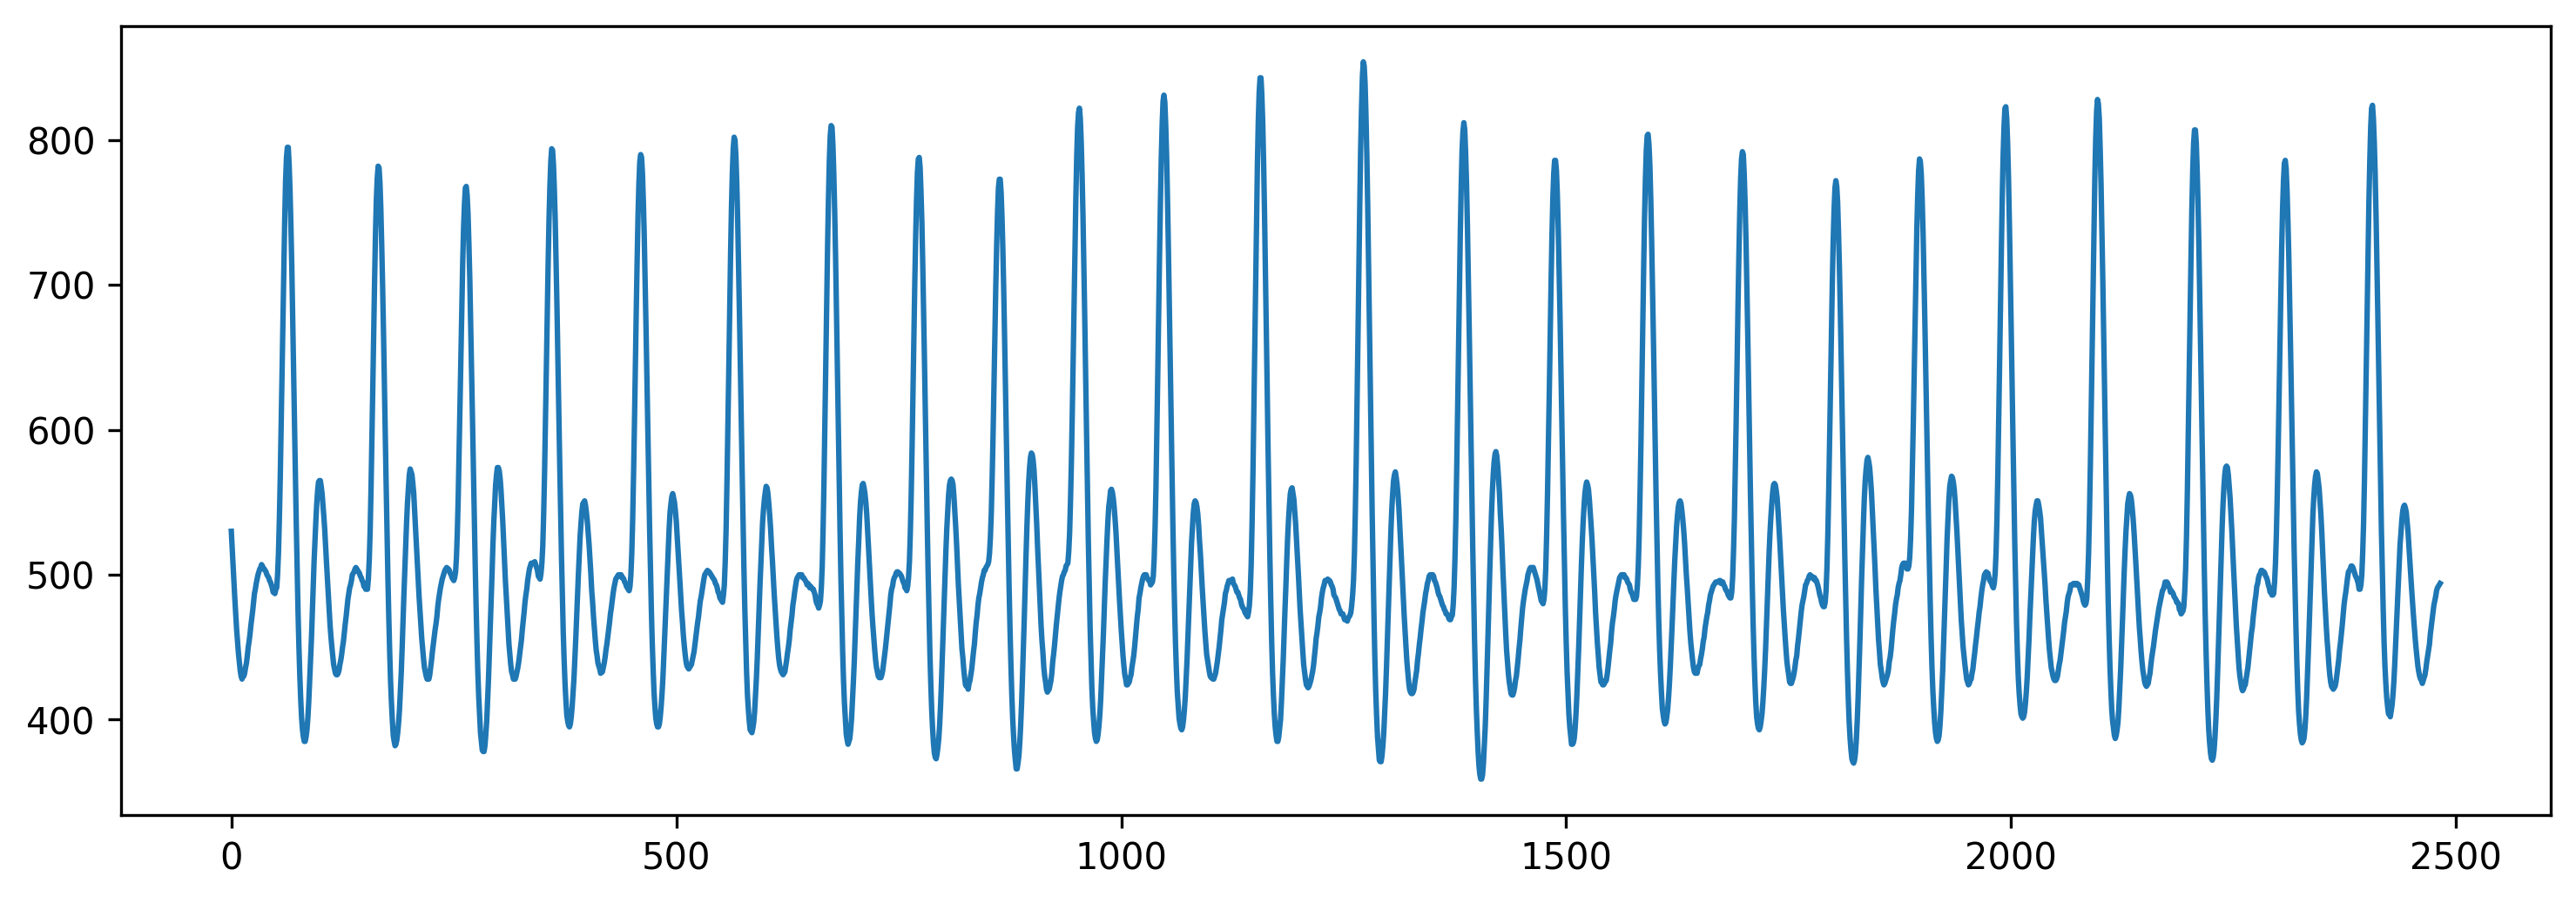

In [157]:
data, timer = hp.load_exampledata(0)

plt.figure(figsize=(12,4))
plt.plot(data)
plt.show()

In [0]:
wd, m = hp.process(data, sample_rate = 100.0)

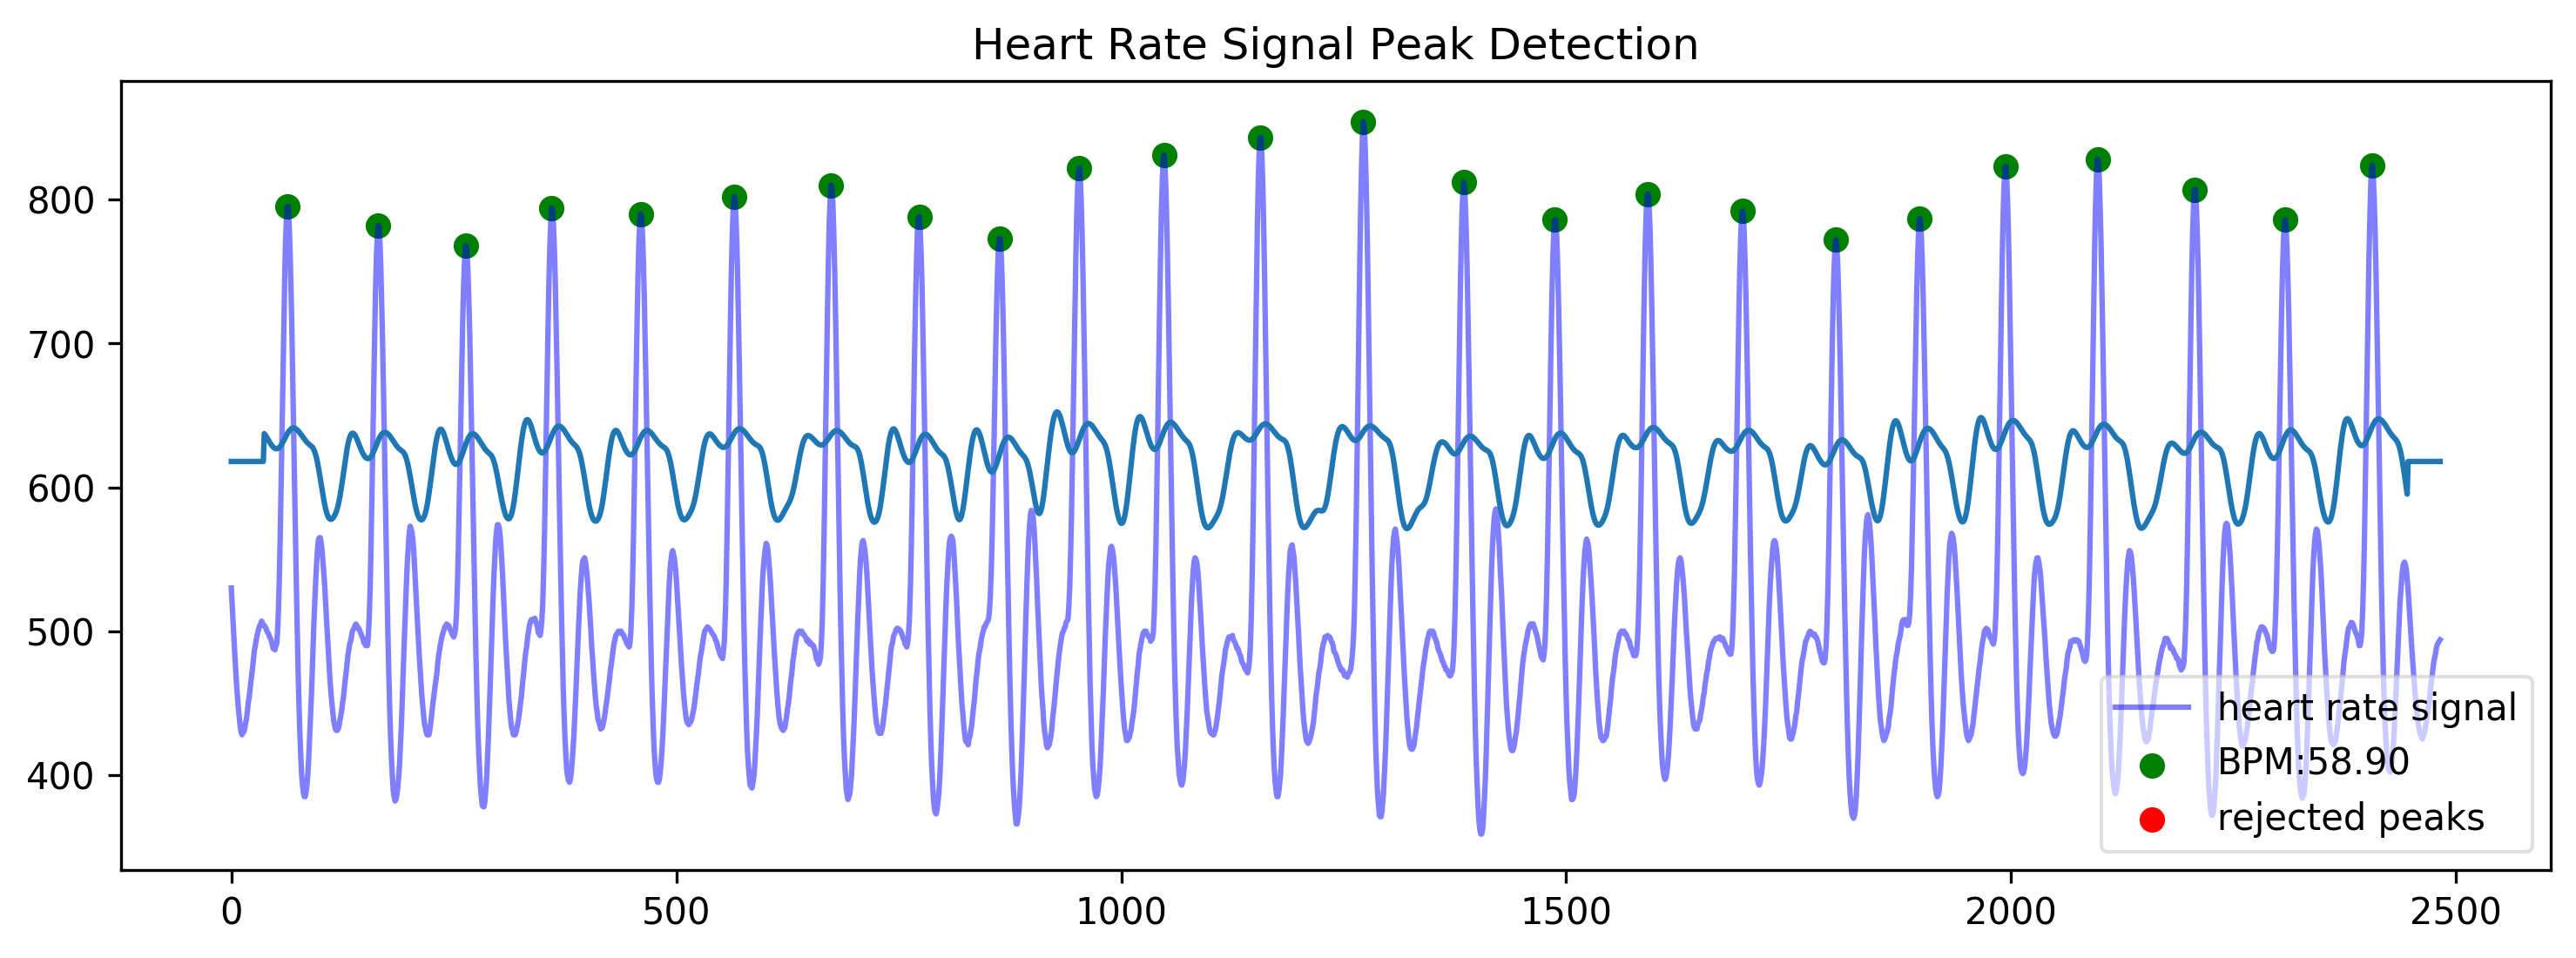

bpm: 58.898848
ibi: 1018.695652
sdnn: 65.760061
sdsd: 34.866925
rmssd: 64.737231
pnn20: 0.863636
pnn50: 0.409091
hr_mad: 40.000000
breathingrate: 0.161095


In [159]:
plt.figure(figsize=(12,4))

hp.plotter(wd, m)

for measure in m.keys():
    print('%s: %f' %(measure, m[measure]))

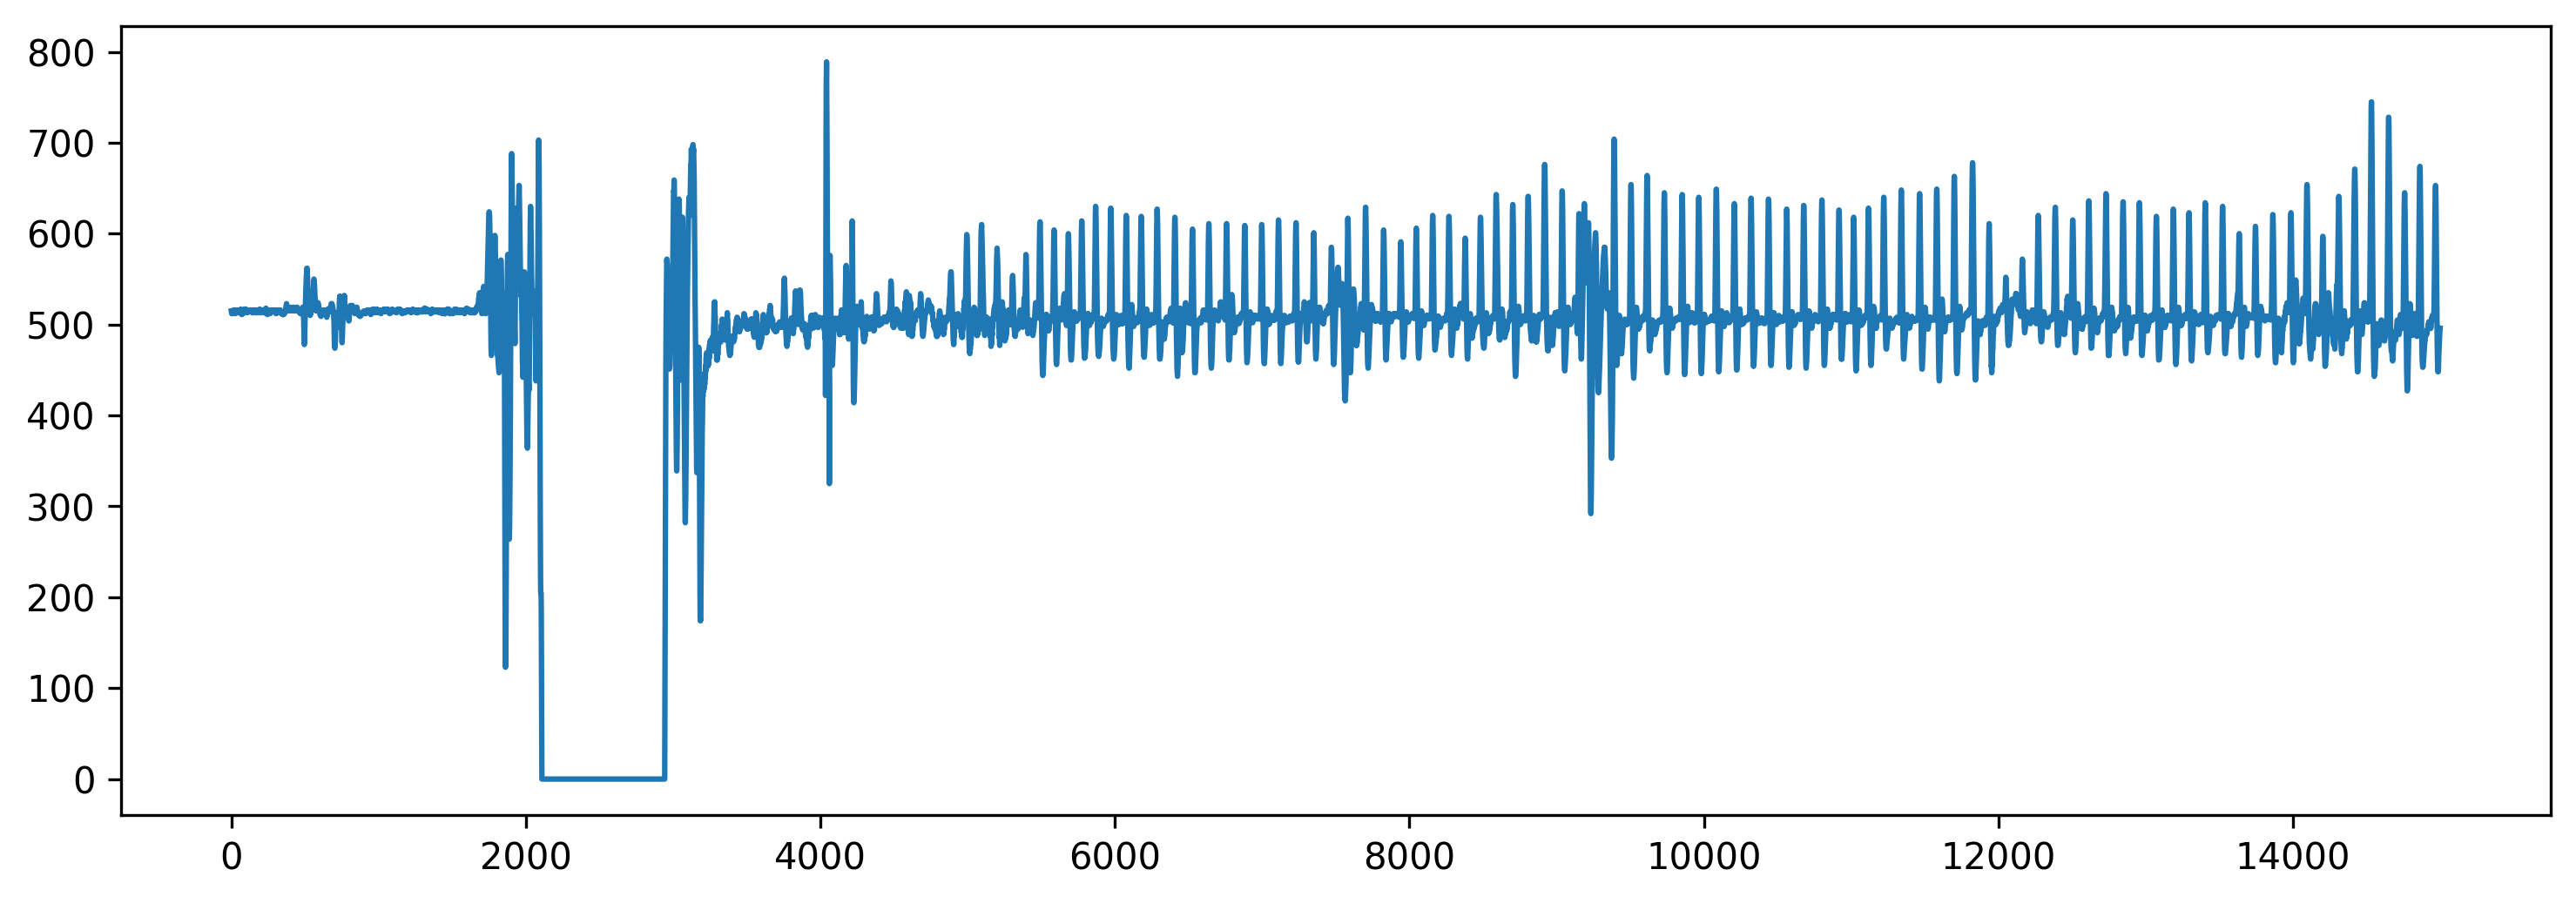

In [160]:
data, timer = hp.load_exampledata(1)

plt.figure(figsize=(12,4))
plt.plot(data)
plt.show()

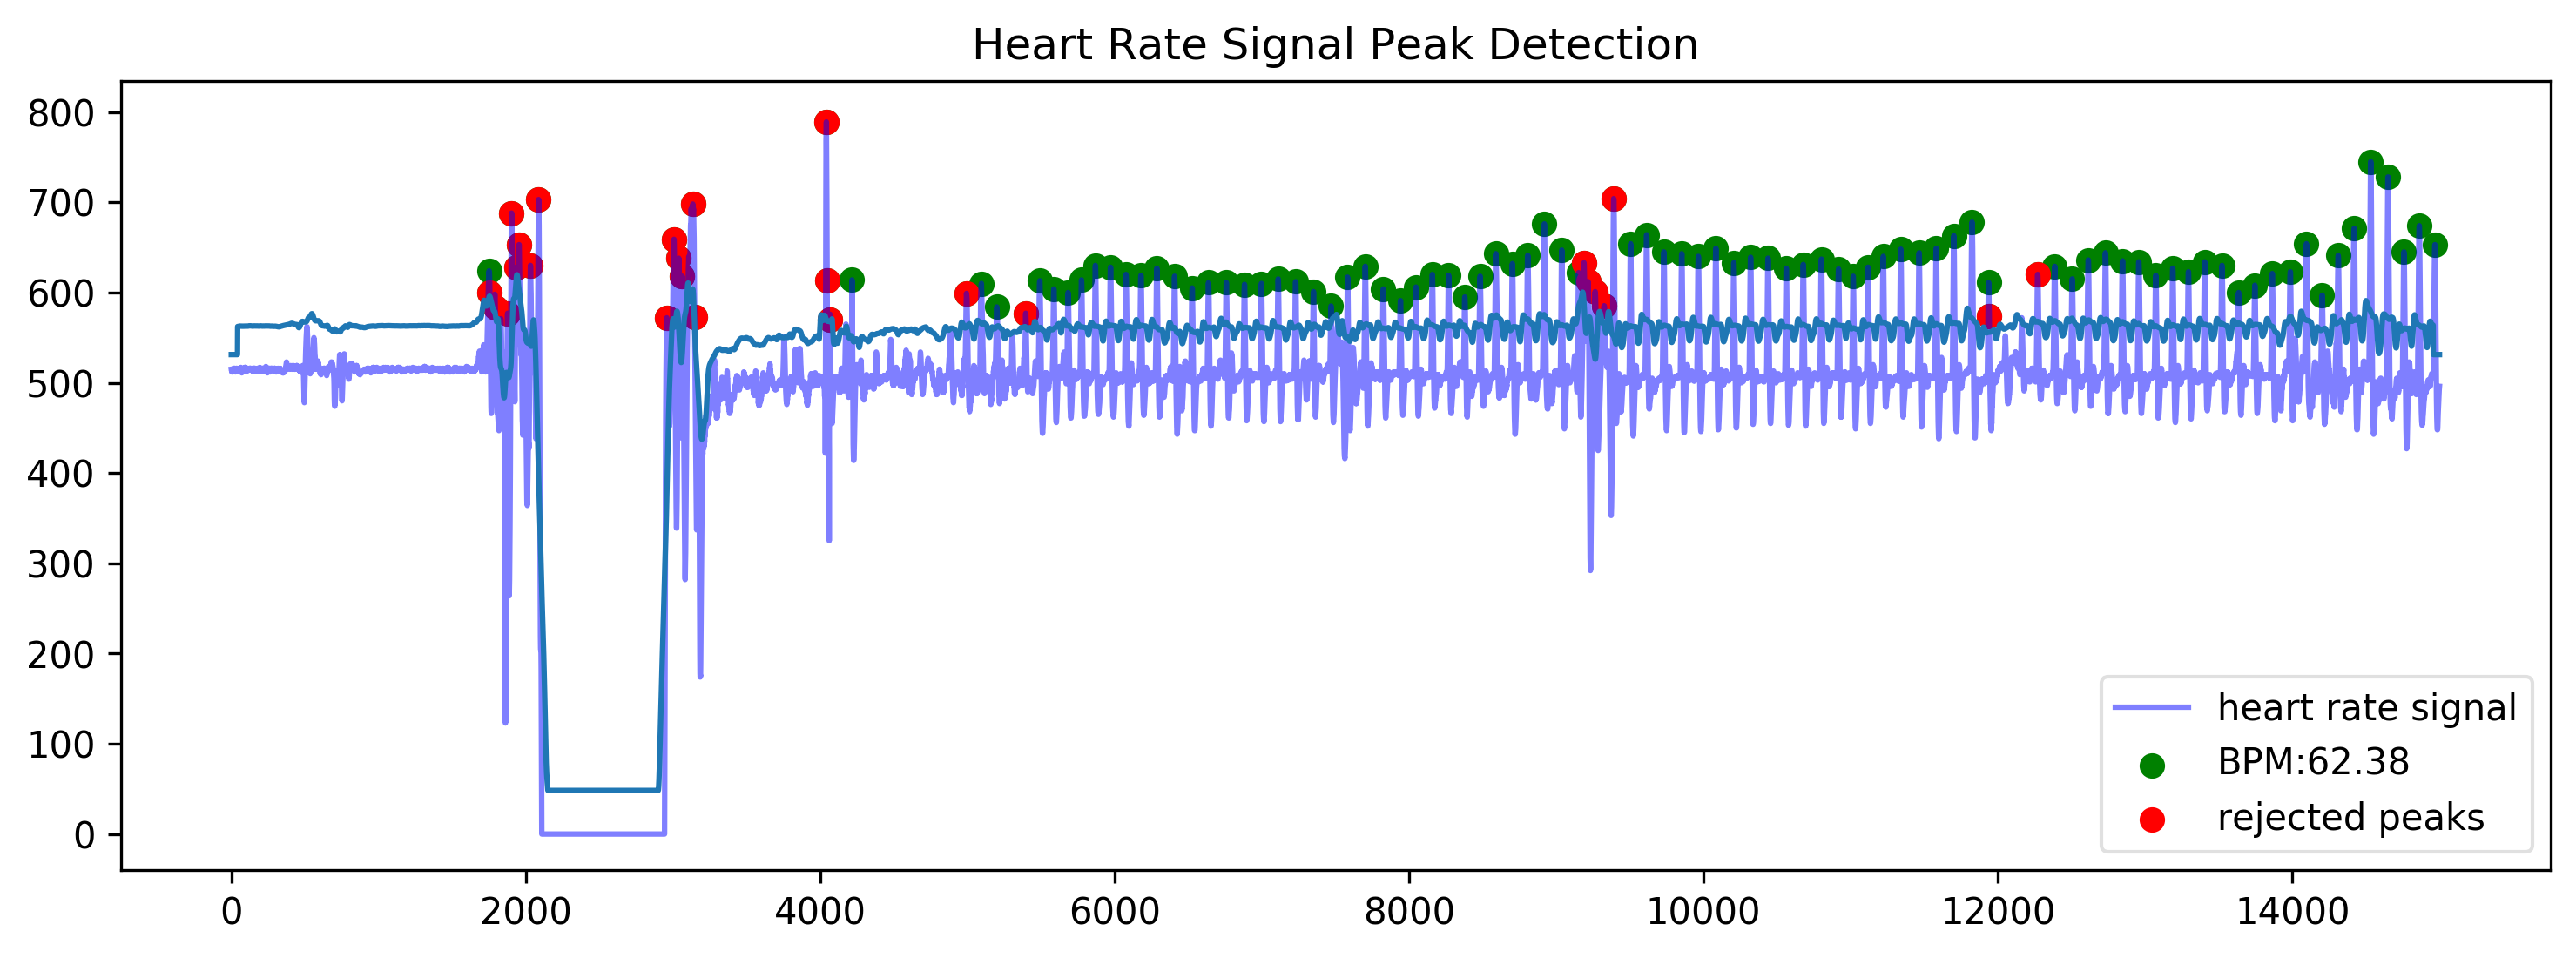

bpm: 62.376304
ibi: 961.903744
sdnn: 64.613519
sdsd: 29.871930
rmssd: 57.069746
pnn20: 0.797297
pnn50: 0.486486
hr_mad: 47.010333
breathingrate: 0.155994


In [161]:
sample_rate = hp.get_samplerate_mstimer(timer)

wd, m = hp.process(data, sample_rate)

plt.figure(figsize=(12,4))
hp.plotter(wd, m)

for measure in m.keys():
    print('%s: %f' %(measure, m[measure]))

In [177]:
np.array(data).shape

(68476,)

In [176]:
data, timer = hp.load_exampledata(2)

hp.process(np.array(data), sample_rate=100)

({'RR_diff': masked_array(data=[40.0, 10.0, 20.0, 10.0, 20.0, 40.0, 110.0, 70.0, 40.0,
                     50.0, 70.0, 10.0, 70.0, 100.0, 210.0, 10.0, 360.0,
                     100.0, 30.0, 80.0, 50.0, 30.0, 20.0, 20.0, 10.0, 20.0,
                     0.0, 0.0, 50.0, 20.0, 50.0, 0.0, 10.0, 0.0, 30.0, 0.0,
                     30.0, 20.0, 30.0, 50.0, 80.0, 100.0, 50.0, 10.0, 10.0,
                     60.0, 20.0, 40.0, 30.0, 20.0, 40.0, 70.0, 70.0, 90.0,
                     20.0, 60.0, 20.0, 30.0, 10.0, 30.0, 50.0, 90.0, 20.0,
                     0.0, 10.0, 30.0, 20.0, 10.0, 20.0, 50.0, 30.0, 40.0,
                     10.0, 20.0, 10.0, 40.0, 10.0, 10.0, 10.0, 10.0, 30.0,
                     10.0, 10.0, 10.0, 30.0, 0.0, 0.0, 0.0, 0.0, 10.0, 0.0,
                     0.0, 0.0, 0.0, 10.0, 20.0, 10.0, 10.0, 10.0, 10.0,
                     40.0, 10.0, 50.0, 20.0, 30.0, 0.0, 0.0, 10.0, 50.0,
                     0.0, 0.0, 30.0, 20.0, 30.0, 30.0, 0.0, 20.0, 40.0,
                     

In [167]:
ed1 = hp.load_exampledata(0)

2483